In [215]:
# import des librairy

import pandas as pd
import numpy as np
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt

#imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.linear_model import BayesianRidge

pd.options.display.max_columns = 999

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [216]:
# path 
root_path =r"C:\Users\alojou\Notebook Python\Projet_7 Modèle de scoring\Data"
print(glob.glob(F"{root_path}\*.csv"))

all_path_data = glob.glob(F"{root_path}\*.csv")

['C:\\Users\\alojou\\Notebook Python\\Projet_7 Modèle de scoring\\Data\\application_test.csv', 'C:\\Users\\alojou\\Notebook Python\\Projet_7 Modèle de scoring\\Data\\application_train.csv', 'C:\\Users\\alojou\\Notebook Python\\Projet_7 Modèle de scoring\\Data\\bureau.csv', 'C:\\Users\\alojou\\Notebook Python\\Projet_7 Modèle de scoring\\Data\\bureau_balance.csv', 'C:\\Users\\alojou\\Notebook Python\\Projet_7 Modèle de scoring\\Data\\credit_card_balance.csv', 'C:\\Users\\alojou\\Notebook Python\\Projet_7 Modèle de scoring\\Data\\df_clean.csv', 'C:\\Users\\alojou\\Notebook Python\\Projet_7 Modèle de scoring\\Data\\HomeCredit_columns_description.csv', 'C:\\Users\\alojou\\Notebook Python\\Projet_7 Modèle de scoring\\Data\\installments_payments.csv', 'C:\\Users\\alojou\\Notebook Python\\Projet_7 Modèle de scoring\\Data\\POS_CASH_balance.csv', 'C:\\Users\\alojou\\Notebook Python\\Projet_7 Modèle de scoring\\Data\\previous_application.csv', 'C:\\Users\\alojou\\Notebook Python\\Projet_7 Modèle

In [217]:
for path in all_path_data:
    print(path.split("\\")[-1],"\n")
    
    df = pd.read_csv(path)
    
    print("columns :\n",df.columns)
    display(df.count())
    
    print("\nheader")
    display(df.head())
    
    print("\ndescribe")
    display(df.describe())
    
    print("\n\n")
    
#seuil de corr ~0.7

application_test.csv 

columns :
 Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=121)


SK_ID_CURR                    48744
NAME_CONTRACT_TYPE            48744
CODE_GENDER                   48744
FLAG_OWN_CAR                  48744
FLAG_OWN_REALTY               48744
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     42695
AMT_REQ_CREDIT_BUREAU_WEEK    42695
AMT_REQ_CREDIT_BUREAU_MON     42695
AMT_REQ_CREDIT_BUREAU_QRT     42695
AMT_REQ_CREDIT_BUREAU_YEAR    42695
Length: 121, dtype: int64


header


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working               Higher education   
1   Unaccompanied          Working  Secondary / secondary special   
2             NaN          Working               Higher education   
3   Unaccompanied          Working  Secondary / secondary special   
4   Unaccompanied          Working  Secondary / secondary special   

  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0            Married  House / apartment                    0.018850   
1            Married  House / apartment                    0.035792   
2            Married  House / apartment                    0.019101   
3            Married  House / apartment                    0.026392   
4            Married  House / apartment                    0.010032   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0      -19241          -2329            -5170.0             -812          NaN   
1      -18064          -4469            -9118.0            -1623          NaN   
2      -20038          -4458            -2175.0            -3503          5.0   
3      -13976          -1866            -2000.0            -4208          NaN   
4      -13040          -2191            -4000.0            -4262         16.0   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           0   
1           1               1                0                 1           0   
2           1               1                0                 1           0   
3           1               1                0                 1           1   
4           1               1                1                 1           0   

   FLAG_EMAIL     OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           1                 NaN              2.0                     2   
1           0  Low-skill Laborers              2.0                     2   
2           0             Drivers              2.0                     2   
3           0         Sales staff              4.0                     2   
4           0                 NaN              3.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                    TUESDAY   
1                            2                     FRIDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                     FRIDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       18                           0   
1                        9                           0   
2                       14                           0   
3                       11                           0   
4                        5                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                   


describe


SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count   48744.000000  48744.000000      4.874400e+04  4.874400e+04   
mean   277796.676350      0.397054      1.784318e+05  5.167404e+05   
std    103169.547296      0.709047      1.015226e+05  3.653970e+05   
min    100001.000000      0.000000      2.694150e+04  4.500000e+04   
25%    188557.750000      0.000000      1.125000e+05  2.606400e+05   
50%    277549.000000      0.000000      1.575000e+05  4.500000e+05   
75%    367555.500000      1.000000      2.250000e+05  6.750000e+05   
max    456250.000000     20.000000      4.410000e+06  2.245500e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
count   48720.000000     4.874400e+04                48744.000000   
mean    29426.240209     4.626188e+05                    0.021226   
std     16016.368315     3.367102e+05                    0.014428   
min      2295.000000     4.500000e+04                    0.000253   
25%     17973.000000     2.250000e+05                    0.010006   
50%     26199.000000     3.960000e+05                    0.018850   
75%     37390.500000     6.300000e+05                    0.028663   
max    180576.000000     2.245500e+06                    0.072508   

         DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
count  48744.000000   48744.000000       48744.000000     48744.000000   
mean  -16068.084605   67485.366322       -4967.652716     -3051.712949   
std     4325.900393  144348.507136        3552.612035      1569.276709   
min   -25195.000000  -17463.000000      -23722.000000     -6348.000000   
25%   -19637.000000   -2910.000000       -7459.250000     -4448.000000   
50%   -15785.000000   -1293.000000       -4490.000000     -3234.000000   
75%   -12496.000000    -296.000000       -1901.000000     -1706.000000   
max    -7338.000000  365243.000000           0.000000         0.000000   

        OWN_CAR_AGE    FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
count  16432.000000  48744.000000    48744.000000     48744.000000   
mean      11.786027      0.999979        0.809720         0.204702   
std       11.462889      0.004529        0.392526         0.403488   
min        0.000000      0.000000        0.000000         0.000000   
25%        4.000000      1.000000        1.000000         0.000000   
50%        9.000000      1.000000        1.000000         0.000000   
75%       15.000000      1.000000        1.000000         0.000000   
max       74.000000      1.000000        1.000000         1.000000   

       FLAG_CONT_MOBILE    FLAG_PHONE    FLAG_EMAIL  CNT_FAM_MEMBERS  \
count      48744.000000  48744.000000  48744.000000     48744.000000   
mean           0.998400      0.263130      0.162646         2.146767   
std            0.039971      0.440337      0.369046         0.890423   
min            0.000000      0.000000      0.000000         1.000000   
25%            1.000000      0.000000      0.000000         2.000000   
50%            1.000000      0.000000      0.000000         2.000000   
75%            1.000000      1.000000      0.000000         3.000000   
max            1.000000      1.000000      1.000000        21.000000   

       REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count          48744.000000                 48744.000000   
mean               2.038159                     2.012596   
std                0.522694                     0.515804   
min                1.000000                    -1.000000   
25%                2.000000                     2.000000   
50%                2.000000                     2.000000   
75%                2.000000                     2.000000   
max                3.000000                     3.000000   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
count             48744.000000                48744.000000   
mean                 12.007365                    0.018833   
std                   3.278172                    0.135937   
min                  




application_train.csv 

columns :
 Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)


SK_ID_CURR                    307511
TARGET                        307511
NAME_CONTRACT_TYPE            307511
CODE_GENDER                   307511
FLAG_OWN_CAR                  307511
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY     265992
AMT_REQ_CREDIT_BUREAU_WEEK    265992
AMT_REQ_CREDIT_BUREAU_MON     265992
AMT_REQ_CREDIT_BUREAU_QRT     265992
AMT_REQ_CREDIT_BUREAU_YEAR    265992
Length: 122, dtype: int64


header


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        


describe


SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       




bureau.csv 

columns :
 Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY'],
      dtype='object')


SK_ID_CURR                1716428
SK_ID_BUREAU              1716428
CREDIT_ACTIVE             1716428
CREDIT_CURRENCY           1716428
DAYS_CREDIT               1716428
CREDIT_DAY_OVERDUE        1716428
DAYS_CREDIT_ENDDATE       1610875
DAYS_ENDDATE_FACT         1082775
AMT_CREDIT_MAX_OVERDUE     591940
CNT_CREDIT_PROLONG        1716428
AMT_CREDIT_SUM            1716415
AMT_CREDIT_SUM_DEBT       1458759
AMT_CREDIT_SUM_LIMIT      1124648
AMT_CREDIT_SUM_OVERDUE    1716428
CREDIT_TYPE               1716428
DAYS_CREDIT_UPDATE        1716428
AMT_ANNUITY                489637
dtype: int64


header


SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN


describe


SK_ID_CURR  SK_ID_BUREAU   DAYS_CREDIT  CREDIT_DAY_OVERDUE  \
count  1.716428e+06  1.716428e+06  1.716428e+06        1.716428e+06   
mean   2.782149e+05  5.924434e+06 -1.142108e+03        8.181666e-01   
std    1.029386e+05  5.322657e+05  7.951649e+02        3.654443e+01   
min    1.000010e+05  5.000000e+06 -2.922000e+03        0.000000e+00   
25%    1.888668e+05  5.463954e+06 -1.666000e+03        0.000000e+00   
50%    2.780550e+05  5.926304e+06 -9.870000e+02        0.000000e+00   
75%    3.674260e+05  6.385681e+06 -4.740000e+02        0.000000e+00   
max    4.562550e+05  6.843457e+06  0.000000e+00        2.792000e+03   

       DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  AMT_CREDIT_MAX_OVERDUE  \
count         1.610875e+06       1.082775e+06            5.919400e+05   
mean          5.105174e+02      -1.017437e+03            3.825418e+03   
std           4.994220e+03       7.140106e+02            2.060316e+05   
min          -4.206000e+04      -4.202300e+04            0.000000e+00   
25%          -1.138000e+03      -1.489000e+03            0.000000e+00   
50%          -3.300000e+02      -8.970000e+02            0.000000e+00   
75%           4.740000e+02      -4.250000e+02            0.000000e+00   
max           3.119900e+04       0.000000e+00            1.159872e+08   

       CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  \
count        1.716428e+06    1.716415e+06         1.458759e+06   
mean         6.410406e-03    3.549946e+05         1.370851e+05   
std          9.622391e-02    1.149811e+06         6.774011e+05   
min          0.000000e+00    0.000000e+00        -4.705600e+06   
25%          0.000000e+00    5.130000e+04         0.000000e+00   
50%          0.000000e+00    1.255185e+05         0.000000e+00   
75%          0.000000e+00    3.150000e+05         4.015350e+04   
max          9.000000e+00    5.850000e+08         1.701000e+08   

       AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  DAYS_CREDIT_UPDATE  \
count          1.124648e+06            1.716428e+06        1.716428e+06   
mean           6.229515e+03            3.791276e+01       -5.937483e+02   
std            4.503203e+04            5.937650e+03        7.207473e+02   
min           -5.864061e+05            0.000000e+00       -4.194700e+04   
25%            0.000000e+00            0.000000e+00       -9.080000e+02   
50%            0.000000e+00            0.000000e+00       -3.950000e+02   
75%            0.000000e+00            0.000000e+00       -3.300000e+01   
max            4.705600e+06            3.756681e+06        3.720000e+02   

        AMT_ANNUITY  
count  4.896370e+05  
mean   1.571276e+04  
std    3.258269e+05  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    1.350000e+04  
max    1.184534e+08




bureau_balance.csv 

columns :
 Index(['SK_ID_BUREAU', 'MONTHS_BALANCE', 'STATUS'], dtype='object')


SK_ID_BUREAU      27299925
MONTHS_BALANCE    27299925
STATUS            27299925
dtype: int64


header


SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C


describe


SK_ID_BUREAU  MONTHS_BALANCE
count  2.729992e+07    2.729992e+07
mean   6.036297e+06   -3.074169e+01
std    4.923489e+05    2.386451e+01
min    5.001709e+06   -9.600000e+01
25%    5.730933e+06   -4.600000e+01
50%    6.070821e+06   -2.500000e+01
75%    6.431951e+06   -1.100000e+01
max    6.842888e+06    0.000000e+00




credit_card_balance.csv 

columns :
 Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE',
       'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',
       'CNT_INSTALMENT_MATURE_CUM', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'],
      dtype='object')


SK_ID_PREV                    3840312
SK_ID_CURR                    3840312
MONTHS_BALANCE                3840312
AMT_BALANCE                   3840312
AMT_CREDIT_LIMIT_ACTUAL       3840312
AMT_DRAWINGS_ATM_CURRENT      3090496
AMT_DRAWINGS_CURRENT          3840312
AMT_DRAWINGS_OTHER_CURRENT    3090496
AMT_DRAWINGS_POS_CURRENT      3090496
AMT_INST_MIN_REGULARITY       3535076
AMT_PAYMENT_CURRENT           3072324
AMT_PAYMENT_TOTAL_CURRENT     3840312
AMT_RECEIVABLE_PRINCIPAL      3840312
AMT_RECIVABLE                 3840312
AMT_TOTAL_RECEIVABLE          3840312
CNT_DRAWINGS_ATM_CURRENT      3090496
CNT_DRAWINGS_CURRENT          3840312
CNT_DRAWINGS_OTHER_CURRENT    3090496
CNT_DRAWINGS_POS_CURRENT      3090496
CNT_INSTALMENT_MATURE_CUM     3535076
NAME_CONTRACT_STATUS          3840312
SK_DPD                        3840312
SK_DPD_DEF                    3840312
dtype: int64


header


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  AMT_PAYMENT_CURRENT  AMT_PAYMENT_TOTAL_CURRENT  \
0                 1700.325               1800.0                     1800.0   
1                 2250.000               2250.0                     2250.0   
2                 2250.000               2250.0                     2250.0   
3                11795.760              11925.0                    11925.0   
4                22924.890              27000.0                    27000.0   

   AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                     0.000          0.000                 0.000   
1                 60175.080      64875.555             64875.555   
2                 26926.425      31460.085             31460.085   
3                224949.285     233048.970            233048.970   
4                443044.395     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM NAME_CONTRACT_STATUS  \
0                       1.0                       35.0               Active   
1                       0.0                       69.0               Active   
2                       0.0                       30.0               Active   
3                       0.0                       10.0               Active   
4                       1.0                      101.0               Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0


describe


SK_ID_PREV    SK_ID_CURR  MONTHS_BALANCE   AMT_BALANCE  \
count  3.840312e+06  3.840312e+06    3.840312e+06  3.840312e+06   
mean   1.904504e+06  2.783242e+05   -3.452192e+01  5.830016e+04   
std    5.364695e+05  1.027045e+05    2.666775e+01  1.063070e+05   
min    1.000018e+06  1.000060e+05   -9.600000e+01 -4.202502e+05   
25%    1.434385e+06  1.895170e+05   -5.500000e+01  0.000000e+00   
50%    1.897122e+06  2.783960e+05   -2.800000e+01  0.000000e+00   
75%    2.369328e+06  3.675800e+05   -1.100000e+01  8.904669e+04   
max    2.843496e+06  4.562500e+05   -1.000000e+00  1.505902e+06   

       AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  \
count             3.840312e+06              3.090496e+06   
mean              1.538080e+05              5.961325e+03   
std               1.651457e+05              2.822569e+04   
min               0.000000e+00             -6.827310e+03   
25%               4.500000e+04              0.000000e+00   
50%               1.125000e+05              0.000000e+00   
75%               1.800000e+05              0.000000e+00   
max               1.350000e+06              2.115000e+06   

       AMT_DRAWINGS_CURRENT  AMT_DRAWINGS_OTHER_CURRENT  \
count          3.840312e+06                3.090496e+06   
mean           7.433388e+03                2.881696e+02   
std            3.384608e+04                8.201989e+03   
min           -6.211620e+03                0.000000e+00   
25%            0.000000e+00                0.000000e+00   
50%            0.000000e+00                0.000000e+00   
75%            0.000000e+00                0.000000e+00   
max            2.287098e+06                1.529847e+06   

       AMT_DRAWINGS_POS_CURRENT  AMT_INST_MIN_REGULARITY  AMT_PAYMENT_CURRENT  \
count              3.090496e+06             3.535076e+06         3.072324e+06   
mean               2.968805e+03             3.540204e+03         1.028054e+04   
std                2.079689e+04             5.600154e+03         3.607808e+04   
min                0.000000e+00             0.000000e+00         0.000000e+00   
25%                0.000000e+00             0.000000e+00         1.523700e+02   
50%                0.000000e+00             0.000000e+00         2.702700e+03   
75%                0.000000e+00             6.633911e+03         9.000000e+03   
max                2.239274e+06             2.028820e+05         4.289207e+06   

       AMT_PAYMENT_TOTAL_CURRENT  AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  \
count               3.840312e+06              3.840312e+06   3.840312e+06   
mean                7.588857e+03              5.596588e+04   5.808881e+04   
std                 3.200599e+04              1.025336e+05   1.059654e+05   
min                 0.000000e+00             -4.233058e+05  -4.202502e+05   
25%                 0.000000e+00              0.000000e+00   0.000000e+00   
50%                 0.000000e+00              0.000000e+00   0.000000e+00   
75%                 6.750000e+03              8.535924e+04   8.889949e+04   
max                 4.278316e+06              1.472317e+06   1.493338e+06   

       AMT_TOTAL_RECEIVABLE  CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  \
count          3.840312e+06              3.090496e+06          3.840312e+06   
mean           5.809829e+04              3.094490e-01          7.031439e-01   
std            1.059718e+05              1.100401e+00          3.190347e+00   
min           -4.202502e+05              0.000000e+00          0.000000e+00   
25%            0.000000e+00              0.000000e+00          0.000000e+00   
50%            0.000000e+00              0.000000e+00          0.000000e+00   
75%            8.891451e+04              0.000000e+00          0.000000e+00   
max            1.493338e+06              5.100000e+01          1.650000e+02   

       CNT_DRAWINGS_OTHER_CURRENT  CNT_DRAWINGS_POS_CURRENT  \
count                3.090496e+06              3.090496e+06   
mean                 4.812496e-03              5.594791e-01   
std    




df_clean.csv 

columns :
 Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)


SK_ID_CURR                    307511
TARGET                        307511
NAME_CONTRACT_TYPE            307511
CODE_GENDER                   307511
FLAG_OWN_CAR                  307511
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY     265992
AMT_REQ_CREDIT_BUREAU_WEEK    265992
AMT_REQ_CREDIT_BUREAU_MON     179073
AMT_REQ_CREDIT_BUREAU_QRT     179073
AMT_REQ_CREDIT_BUREAU_YEAR    179073
Length: 122, dtype: int64


header


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y           2.0          112500.0    291384.0      23490.0   
1               N           0.0          112500.0    835380.0      40189.5   
2               Y           0.0          112500.0    765261.0      32422.5   
3               Y           1.0          166500.0    900000.0      26446.5   
4               Y           0.0          107500.5    299250.0       8226.0   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         270000.0   Unaccompanied          Working   
1         675000.0          Family    State servant   
2         684000.0   Unaccompanied          Working   
3         900000.0   Unaccompanied          Working   
4         225000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.009549    -10483.0        -1803.0            -8954.0   
1                    0.008230    -17547.0        -9756.0            -4368.0   
2                    0.030755    -20790.0       365243.0            -6673.0   
3                    0.020713    -13214.0        -6104.0            -5592.0   
4                    0.035792    -21886.0        -4687.0            -5387.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0          -1899.0     9.589742           1               1                0   
1          -1091.0    12.293486           1               1                0   
2          -4135.0     7.000000           1               1                1   
3          -5187.0    12.207436           1               1                0   
4          -3080.0     1.000000           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              4.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              2.0   
3                 1           0           0        Laborers              3.0   
4                 1           0           0      Core staff              2.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                     11.0   
1                     MONDAY                     16.0   
2                     MONDAY                     10.0   
3                  WEDNESDAY                     13.0   
4                   THURSDAY                     15.0   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        


describe


SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  179073.000000      1.790730e+05   
mean   278180.518577       0.080729       0.416087      1.685457e+05   
std    102790.175348       0.272419       0.721605      1.129649e+05   
min    100002.000000       0.000000       0.000000      2.610000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.485000e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.800009e+07   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  1.790730e+05  179073.000000     1.790730e+05   
mean   5.987701e+05   27105.873525     5.378816e+05   
std    4.024355e+05   14512.922102     3.691599e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16542.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  230161.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               179073.000000  179073.000000  179073.000000   
mean                     0.020870  -16042.565758   64203.445204   
std                      0.013831    4365.123064  141597.879491   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19696.000000   -2762.000000   
50%                      0.018850  -15745.000000   -1212.000000   
75%                      0.028663  -12428.000000    -287.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      179073.000000    179073.000000  179073.000000  307511.000000   
mean        -4987.851011     -2996.595975      12.568240       0.999997   
std          3522.411482      1508.277568       7.383697       0.001803   
min        -24672.000000     -7197.000000    -120.340249       0.000000   
25%         -7483.000000     -4299.000000       9.383990       1.000000   
50%         -4510.000000     -3255.000000      12.587221       1.000000   
75%         -2009.000000     -1726.000000      14.764678       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    179073.000000         307511.000000   
mean        0.056720         2.151127              2.052463   
std         0.231307         0.910674              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            179073.000000   
mean                      2.031521                12.063745   
std                       0.502737                 3.265391   
min                       1.000000                 0.000000   
25%                       




HomeCredit_columns_description.csv 

columns :
 Index(['Unnamed: 0', 'Table', 'Row', 'Description', 'Special'], dtype='object')


Unnamed: 0     219
Table          219
Row            219
Description    219
Special         86
dtype: int64


header


Unnamed: 0                         Table                 Row  \
0           1  application_{train|test}.csv          SK_ID_CURR   
1           2  application_{train|test}.csv              TARGET   
2           5  application_{train|test}.csv  NAME_CONTRACT_TYPE   
3           6  application_{train|test}.csv         CODE_GENDER   
4           7  application_{train|test}.csv        FLAG_OWN_CAR   

                                         Description Special  
0                           ID of loan in our sample     NaN  
1  Target variable (1 - client with payment diffi...     NaN  
2        Identification if loan is cash or revolving     NaN  
3                               Gender of the client     NaN  
4                      Flag if the client owns a car     NaN


describe


Unnamed: 0
count  219.000000
mean   111.981735
std     63.395726
min      1.000000
25%     57.500000
50%    112.000000
75%    166.500000
max    221.000000




installments_payments.csv 

columns :
 Index(['SK_ID_PREV', 'SK_ID_CURR', 'NUM_INSTALMENT_VERSION',
       'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT',
       'AMT_INSTALMENT', 'AMT_PAYMENT'],
      dtype='object')


SK_ID_PREV                13605401
SK_ID_CURR                13605401
NUM_INSTALMENT_VERSION    13605401
NUM_INSTALMENT_NUMBER     13605401
DAYS_INSTALMENT           13605401
DAYS_ENTRY_PAYMENT        13602496
AMT_INSTALMENT            13605401
AMT_PAYMENT               13602496
dtype: int64


header


SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585


describe


SK_ID_PREV    SK_ID_CURR  NUM_INSTALMENT_VERSION  \
count  1.360540e+07  1.360540e+07            1.360540e+07   
mean   1.903365e+06  2.784449e+05            8.566373e-01   
std    5.362029e+05  1.027183e+05            1.035216e+00   
min    1.000001e+06  1.000010e+05            0.000000e+00   
25%    1.434191e+06  1.896390e+05            0.000000e+00   
50%    1.896520e+06  2.786850e+05            1.000000e+00   
75%    2.369094e+06  3.675300e+05            1.000000e+00   
max    2.843499e+06  4.562550e+05            1.780000e+02   

       NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  \
count           1.360540e+07     1.360540e+07        1.360250e+07   
mean            1.887090e+01    -1.042270e+03       -1.051114e+03   
std             2.666407e+01     8.009463e+02        8.005859e+02   
min             1.000000e+00    -2.922000e+03       -4.921000e+03   
25%             4.000000e+00    -1.654000e+03       -1.662000e+03   
50%             8.000000e+00    -8.180000e+02       -8.270000e+02   
75%             1.900000e+01    -3.610000e+02       -3.700000e+02   
max             2.770000e+02    -1.000000e+00       -1.000000e+00   

       AMT_INSTALMENT   AMT_PAYMENT  
count    1.360540e+07  1.360250e+07  
mean     1.705091e+04  1.723822e+04  
std      5.057025e+04  5.473578e+04  
min      0.000000e+00  0.000000e+00  
25%      4.226085e+03  3.398265e+03  
50%      8.884080e+03  8.125515e+03  
75%      1.671021e+04  1.610842e+04  
max      3.771488e+06  3.771488e+06




POS_CASH_balance.csv 

columns :
 Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'CNT_INSTALMENT',
       'CNT_INSTALMENT_FUTURE', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'],
      dtype='object')


SK_ID_PREV               10001358
SK_ID_CURR               10001358
MONTHS_BALANCE           10001358
CNT_INSTALMENT            9975287
CNT_INSTALMENT_FUTURE     9975271
NAME_CONTRACT_STATUS     10001358
SK_DPD                   10001358
SK_DPD_DEF               10001358
dtype: int64


header


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0


describe


SK_ID_PREV    SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
count  1.000136e+07  1.000136e+07    1.000136e+07    9.975287e+06   
mean   1.903217e+06  2.784039e+05   -3.501259e+01    1.708965e+01   
std    5.358465e+05  1.027637e+05    2.606657e+01    1.199506e+01   
min    1.000001e+06  1.000010e+05   -9.600000e+01    1.000000e+00   
25%    1.434405e+06  1.895500e+05   -5.400000e+01    1.000000e+01   
50%    1.896565e+06  2.786540e+05   -2.800000e+01    1.200000e+01   
75%    2.368963e+06  3.674290e+05   -1.300000e+01    2.400000e+01   
max    2.843499e+06  4.562550e+05   -1.000000e+00    9.200000e+01   

       CNT_INSTALMENT_FUTURE        SK_DPD    SK_DPD_DEF  
count           9.975271e+06  1.000136e+07  1.000136e+07  
mean            1.048384e+01  1.160693e+01  6.544684e-01  
std             1.110906e+01  1.327140e+02  3.276249e+01  
min             0.000000e+00  0.000000e+00  0.000000e+00  
25%             3.000000e+00  0.000000e+00  0.000000e+00  
50%             7.000000e+00  0.000000e+00  0.000000e+00  
75%             1.400000e+01  0.000000e+00  0.000000e+00  
max             8.500000e+01  4.231000e+03  3.595000e+03




previous_application.csv 

columns :
 Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')


SK_ID_PREV                     1670214
SK_ID_CURR                     1670214
NAME_CONTRACT_TYPE             1670214
AMT_ANNUITY                    1297979
AMT_APPLICATION                1670214
AMT_CREDIT                     1670213
AMT_DOWN_PAYMENT                774370
AMT_GOODS_PRICE                1284699
WEEKDAY_APPR_PROCESS_START     1670214
HOUR_APPR_PROCESS_START        1670214
FLAG_LAST_APPL_PER_CONTRACT    1670214
NFLAG_LAST_APPL_IN_DAY         1670214
RATE_DOWN_PAYMENT               774370
RATE_INTEREST_PRIMARY             5951
RATE_INTEREST_PRIVILEGED          5951
NAME_CASH_LOAN_PURPOSE         1670214
NAME_CONTRACT_STATUS           1670214
DAYS_DECISION                  1670214
NAME_PAYMENT_TYPE              1670214
CODE_REJECT_REASON             1670214
NAME_TYPE_SUITE                 849809
NAME_CLIENT_TYPE               1670214
NAME_GOODS_CATEGORY            1670214
NAME_PORTFOLIO                 1670214
NAME_PRODUCT_TYPE              1670214
CHANNEL_TYPE             


header


SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D


describe


SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115833    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000




sample_submission.csv 

columns :
 Index(['SK_ID_CURR', 'TARGET'], dtype='object')


SK_ID_CURR    48744
TARGET        48744
dtype: int64


header


SK_ID_CURR  TARGET
0      100001     0.5
1      100005     0.5
2      100013     0.5
3      100028     0.5
4      100038     0.5


describe


SK_ID_CURR   TARGET
count   48744.000000  48744.0
mean   277796.676350      0.5
std    103169.547296      0.0
min    100001.000000      0.5
25%    188557.750000      0.5
50%    277549.000000      0.5
75%    367555.500000      0.5
max    456250.000000      0.5

### let's focus on application_train.csv

In [218]:
#open the dataframe

df_application = pd.read_csv('C:\\Users\\alojou\\Notebook Python\\Projet_7 Modèle de scoring\\Data\\application_train.csv')

In [219]:
df_application.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [220]:
df_application

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0           24700.5         351000.0   Unaccompanied               Working   
1           35698.5        1129500.0          Family         State servant   
2            6750.0         135000.0   Unaccompanied               Working   
3           29686.5         297000.0   Unaccompanied               Working   
4           21865.5         513000.0   Unaccompanied               Working   
...             ...              ...             ...                   ...   
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
...                               ...                   ...   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0       House / apartment                    0.018801       -9461   
1       House / apartment                    0.003541      -16765   
2       House / apartment                    0.010032      -19046   
3       House / apartment                    0.008019      -19005   
4       House / apartment                    0.028663      -19932   
...                   ...                         ...         ...   
307506       With parents                    0.032561       -9327   
307507  House / apartment       

## Format Data

In [221]:
category_features = []
threshold = 10
for each in df_application.columns:
    if df_application[each].nunique() < threshold:
        category_features.append(each)

print("transformed from numerical to categorical : ",category_features)   
        
        
for each in category_features:
    df_application[each] = df_application[each].astype('category')

transformed from numerical to categorical :  ['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DO

In [222]:
obj_col = df_application.select_dtypes("object").columns
for each in obj_col:
    df_application[each] = df_application[each].astype('category')

In [223]:
# split dtypes for futur analysis
numeric_col = df_application.select_dtypes(np.number).columns
cat_col = df_application.select_dtypes("category").columns

In [224]:
print(numeric_col)
print(cat_col)

Index(['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START',
       'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG',
       'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG',
       'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE',
       'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE',
       'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', '

In [225]:
df_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: category(55), float64(61), int64(6)
memory usage: 173.3 MB


In [226]:
df_application.head()

SK_ID_CURR TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002      1         Cash loans           M            N   
1      100003      0         Cash loans           F            N   
2      100004      0    Revolving loans           M            Y   
3      100006      0         Cash loans           F            N   
4      100007      0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE FLAG_MOBIL FLAG_EMP_PHONE FLAG_WORK_PHONE  \
0            -2120          NaN          1              1               0   
1             -291          NaN          1              1               0   
2            -2531         26.0          1              1               1   
3            -2437          NaN          1              1               0   
4            -3458          NaN          1              1               0   

  FLAG_CONT_MOBILE FLAG_PHONE FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                1          1          0        Laborers              1.0   
1                1          1          0      Core staff              2.0   
2                1          1          0        Laborers              1.0   
3                1          0          0        Laborers              2.0   
4                1          0          0      Core staff              1.0   

  REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                    2                           2                  WEDNESDAY   
1                    1                           1                     MONDAY   
2                    2                           2                     MONDAY   
3                    2                           2                  WEDNESDAY   
4                    2                           2                   THURSDAY   

   HOUR_APPR_PROCESS_START REG_REGION_NOT_LIVE_REGION  \
0                       10                          0   
1                       11                          0   
2                        9                          0   
3                       17                          0   
4                       11                          0   

  REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION  \
0                          0            

## Gestion des NAN

In [227]:
nan_col = df_application.isna().sum()[df_application.isna().sum()> 0].to_frame().T.columns

num_nan_col = df_application[nan_col].select_dtypes(np.number).columns
cat_nan_col = df_application[nan_col].select_dtypes("category").columns

## Catégoriel

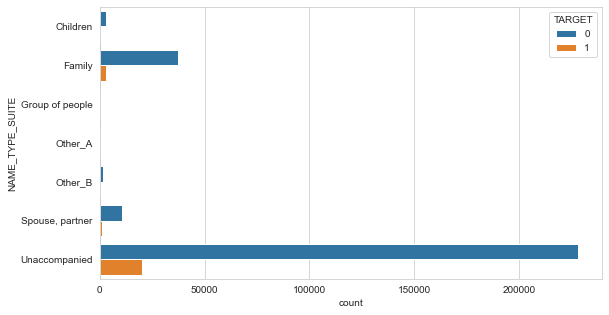

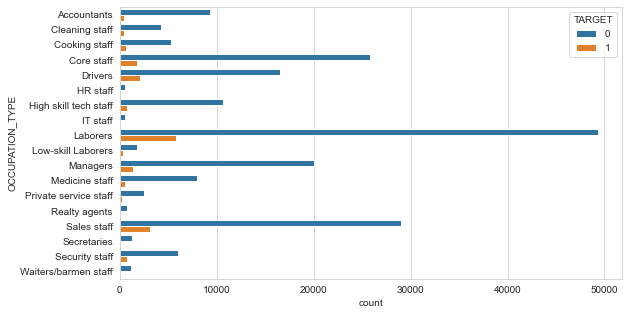

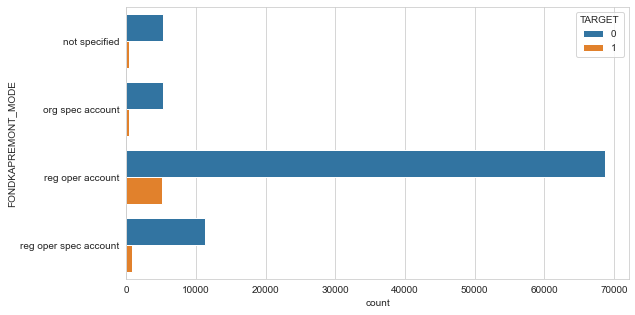

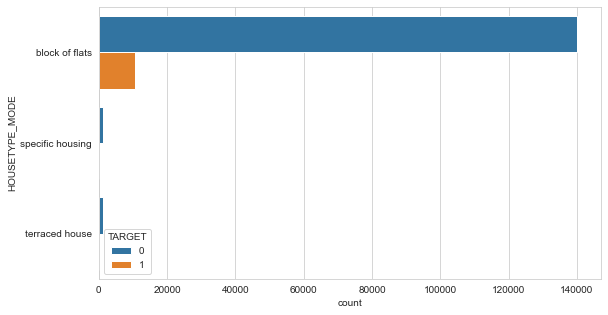

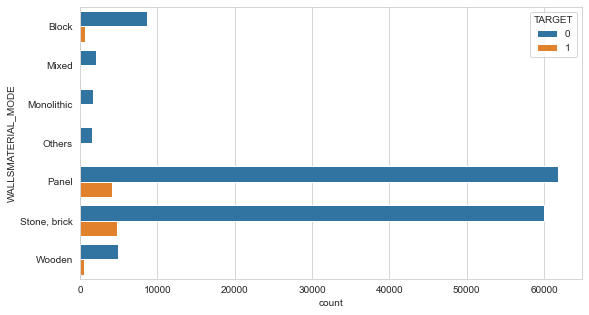

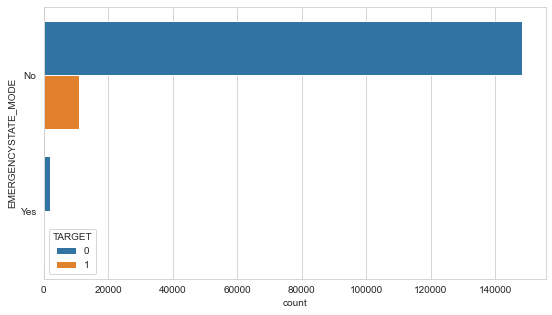

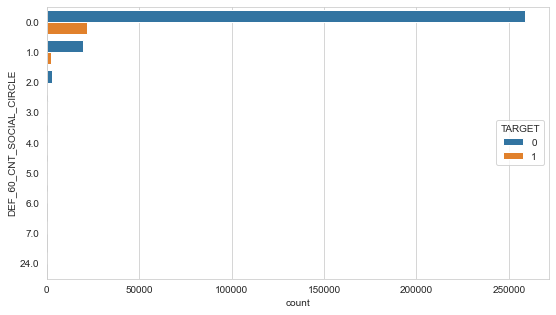

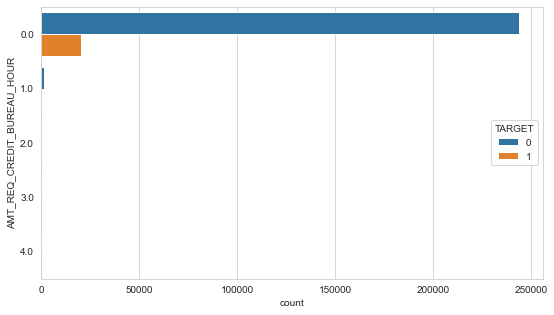

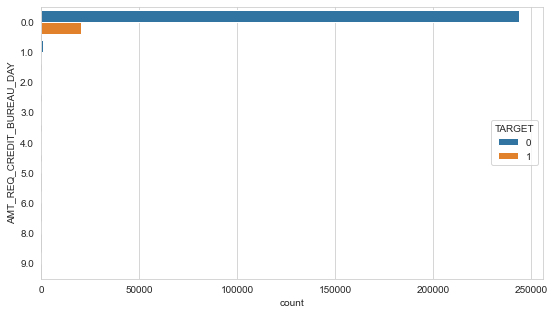

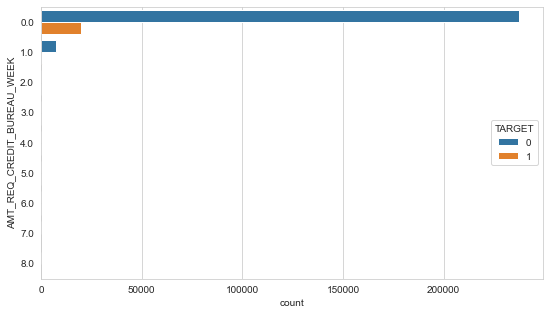

In [228]:
for colu in cat_nan_col:
    plt.figure(figsize=(9, 5))
    ax = sns.countplot(y=colu, hue="TARGET",data=df_application)
    plt.show()

## Numerique

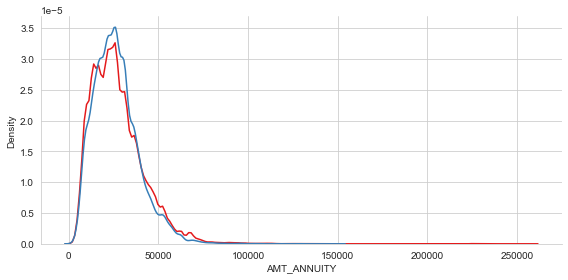

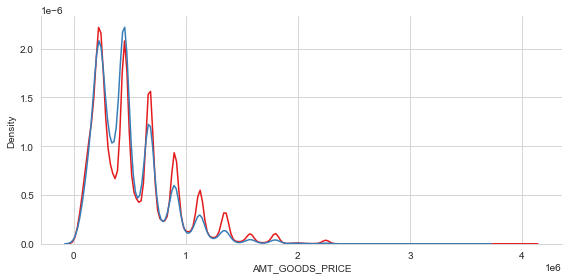

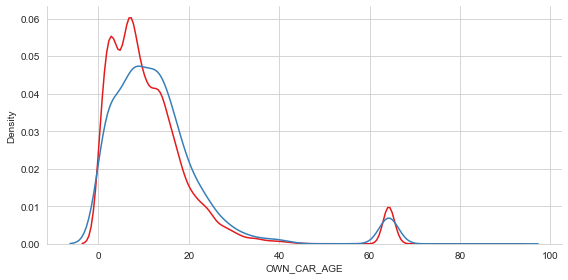

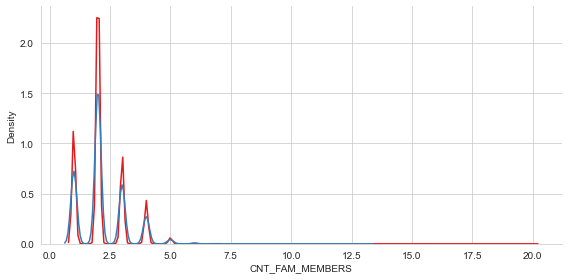

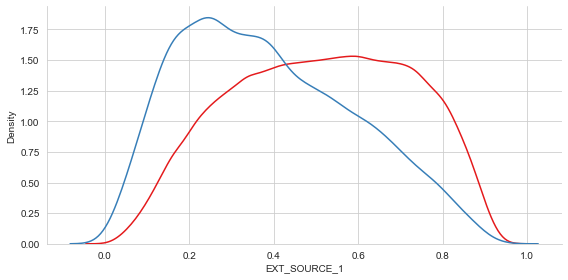

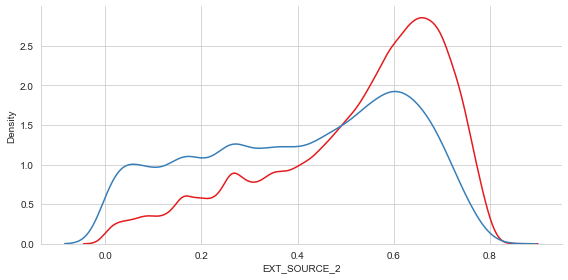

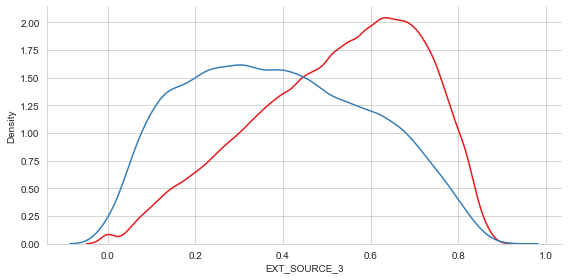

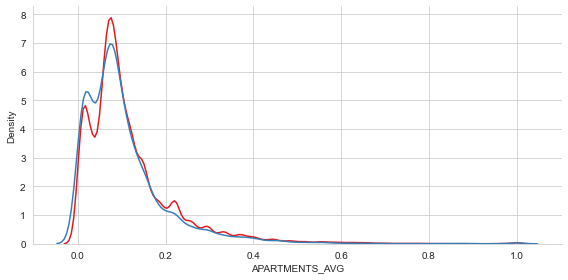

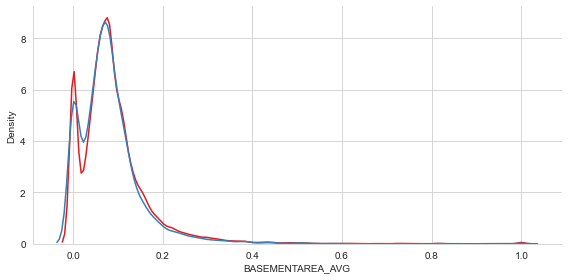

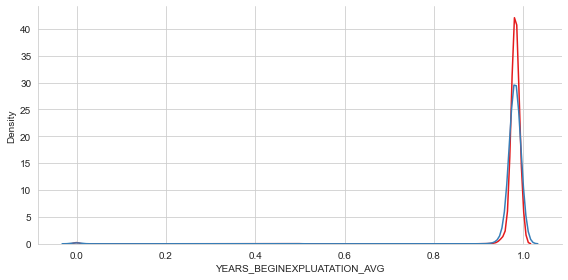

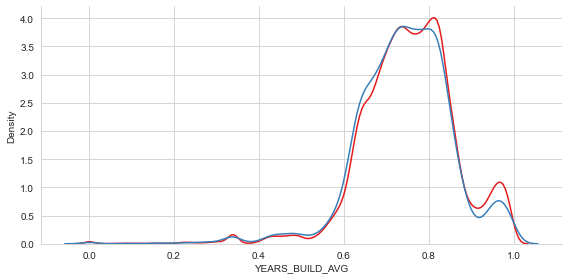

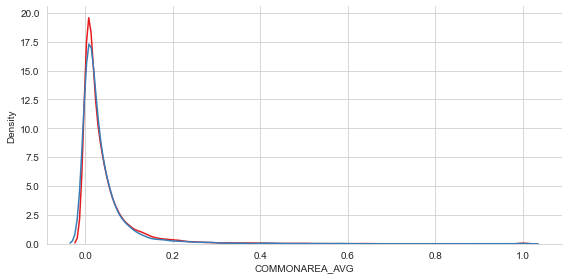

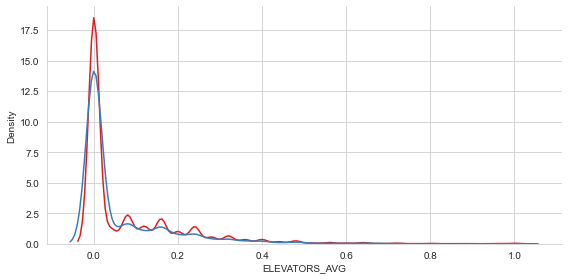

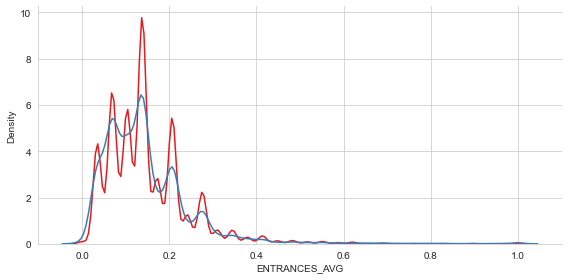

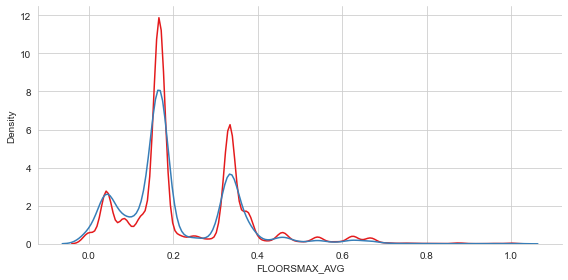

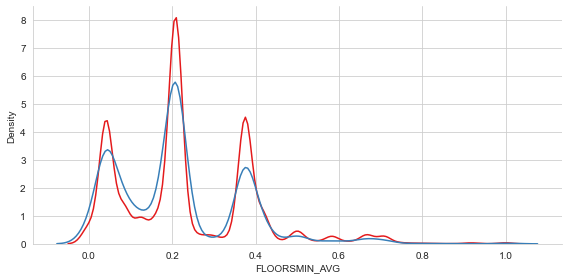

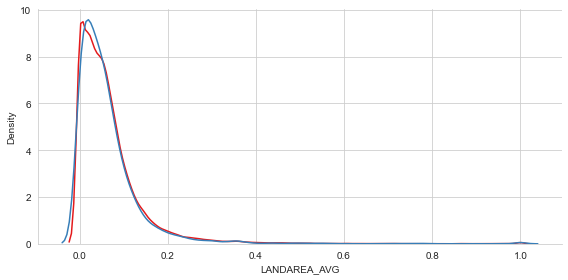

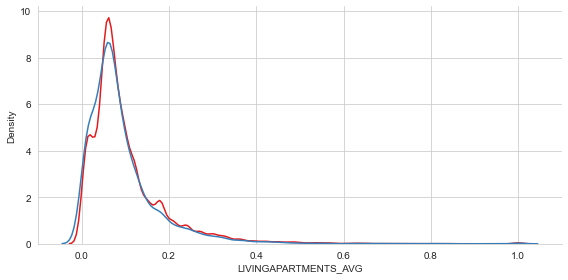

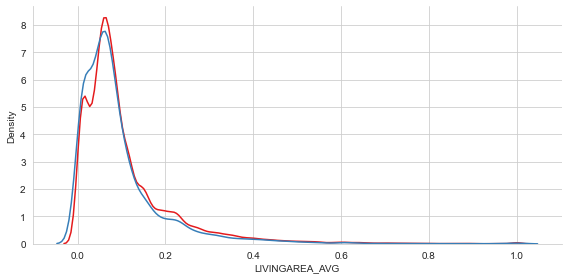

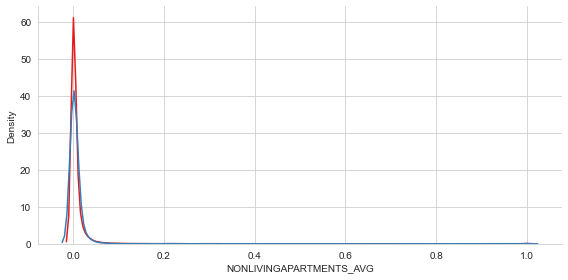

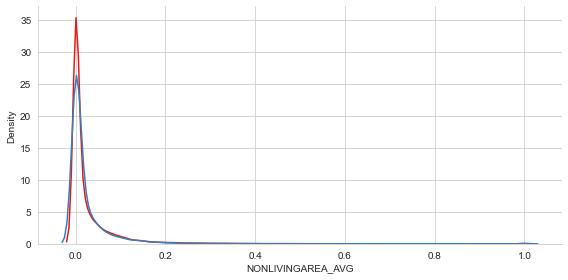

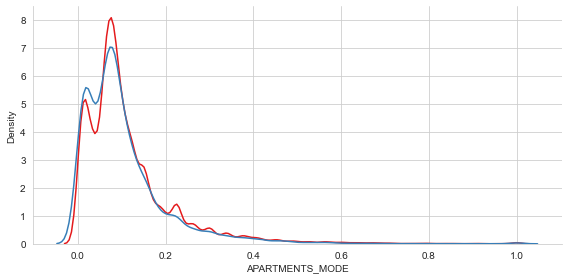

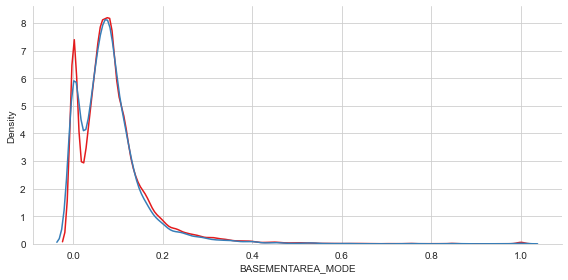

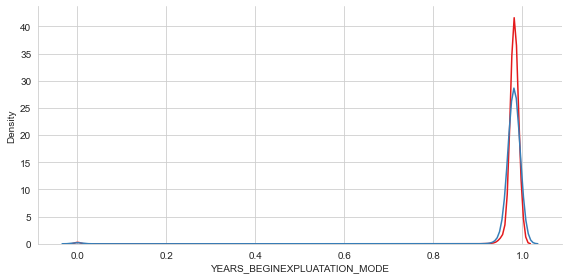

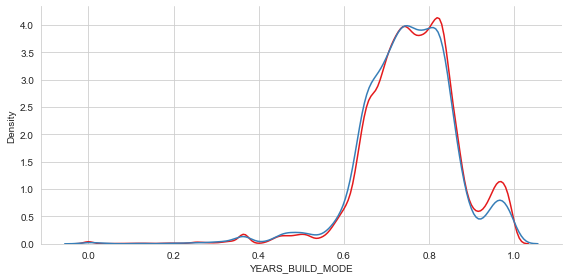

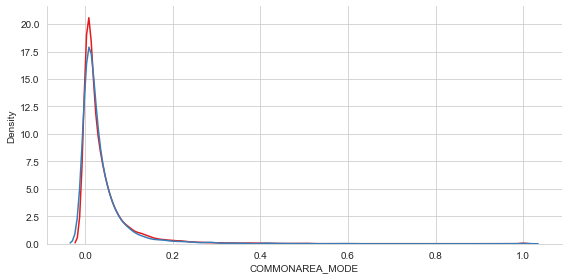

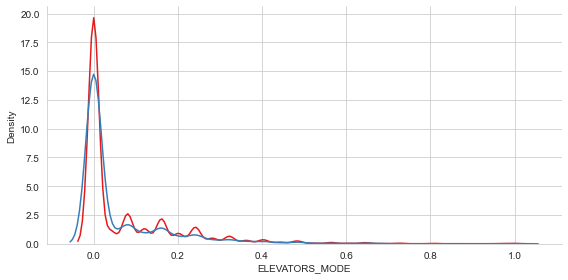

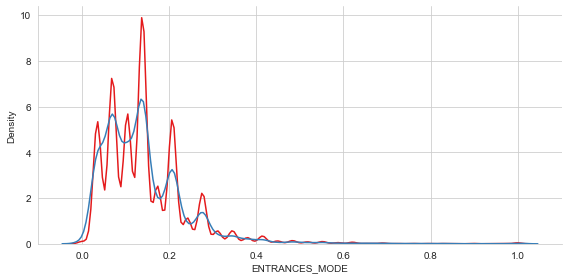

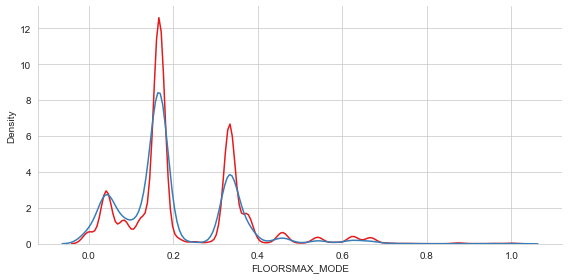

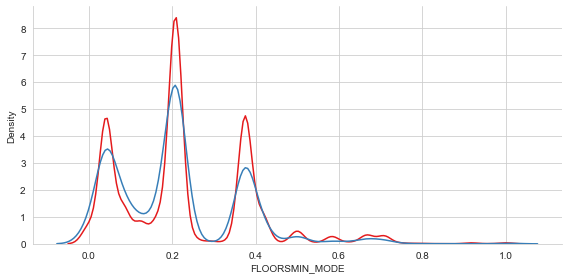

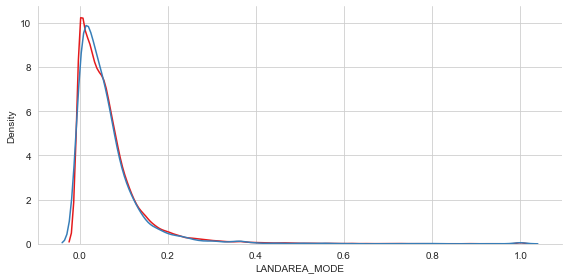

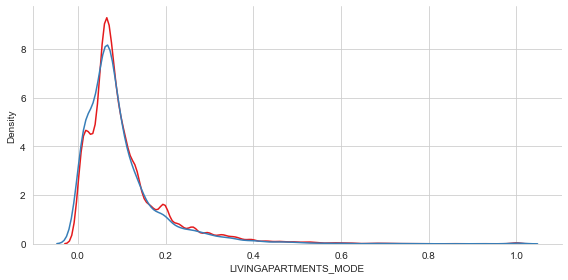

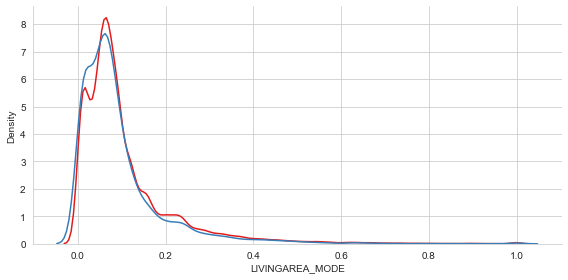

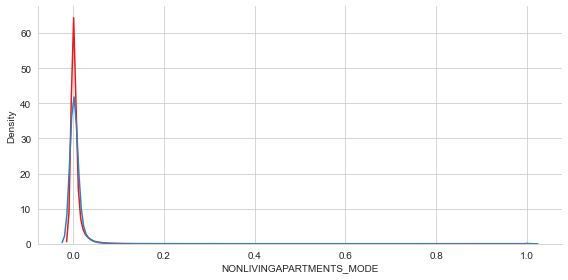

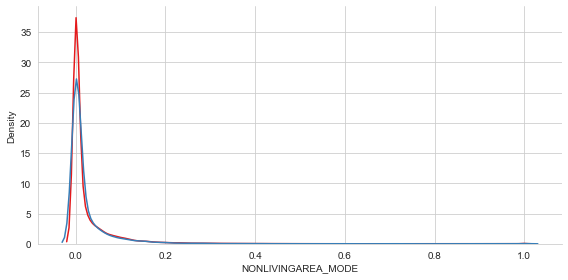

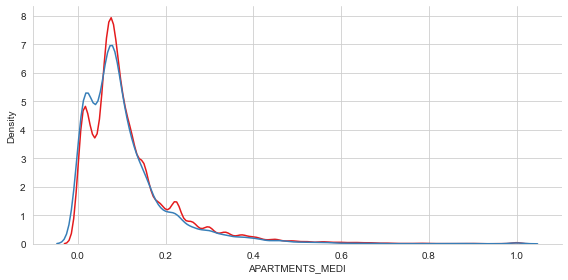

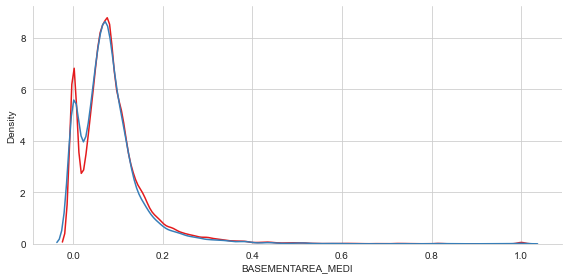

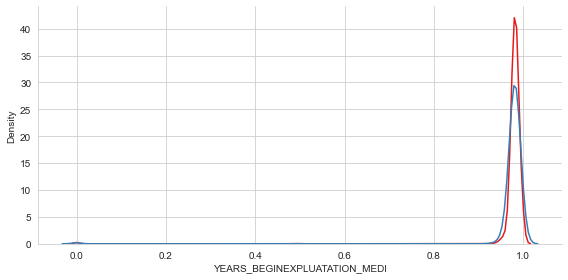

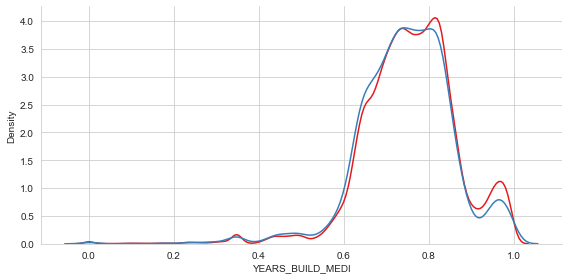

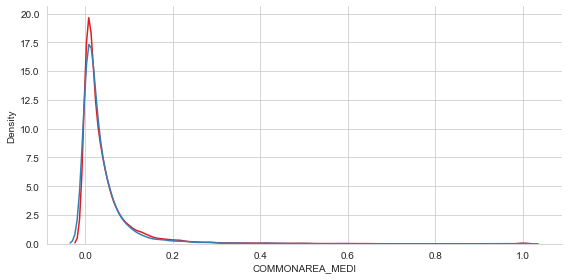

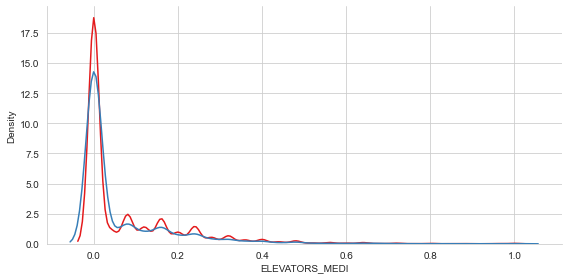

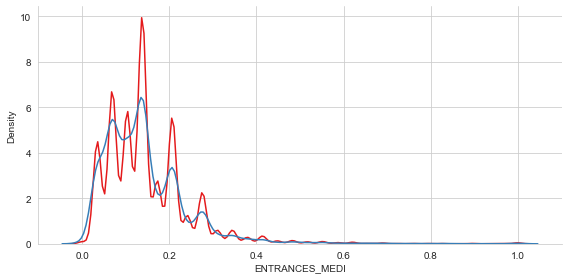

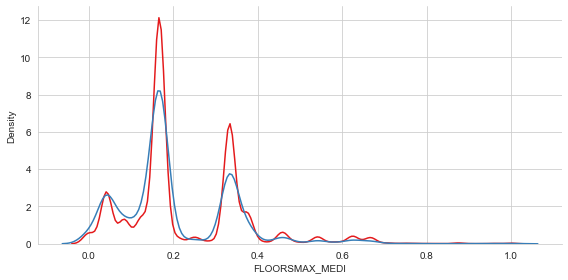

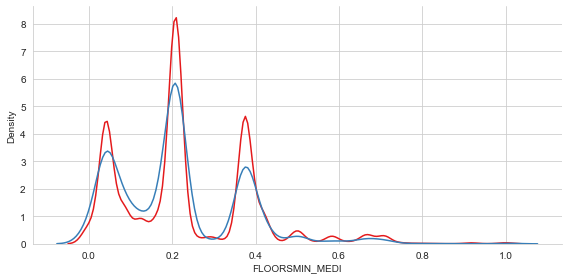

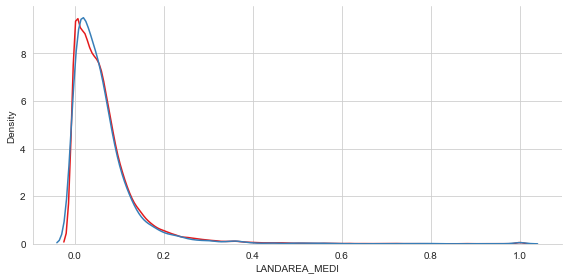

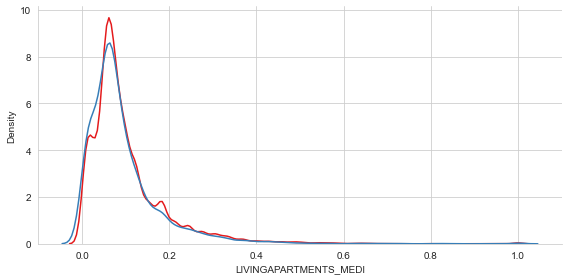

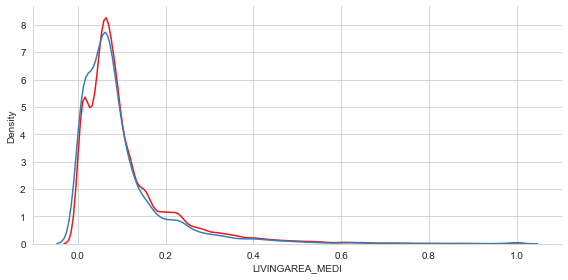

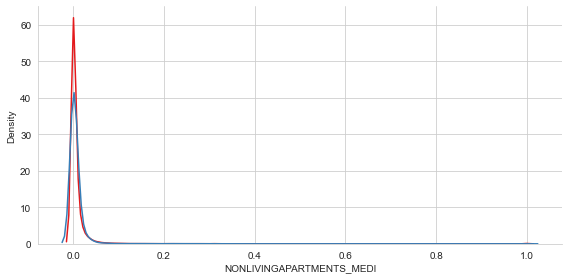

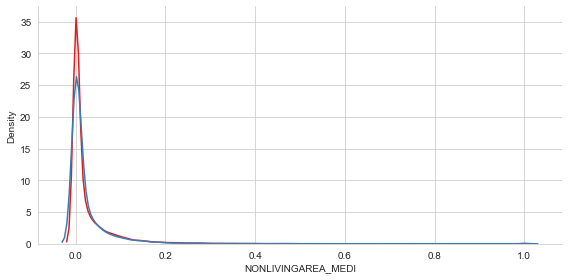

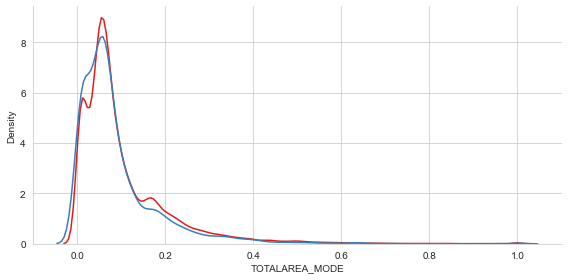

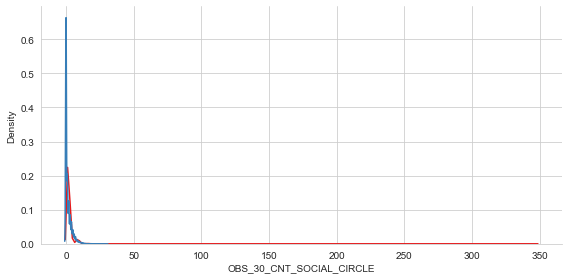

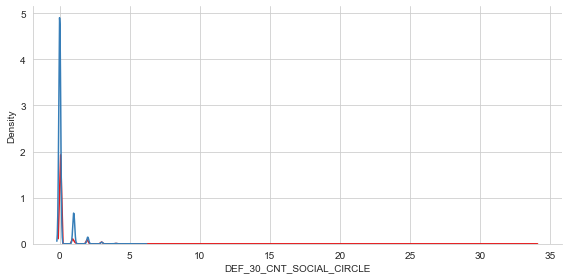

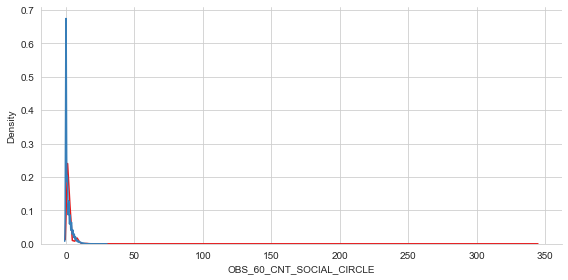

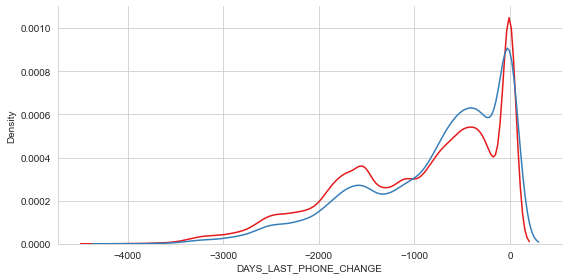

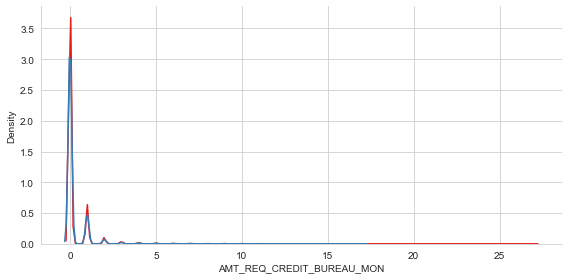

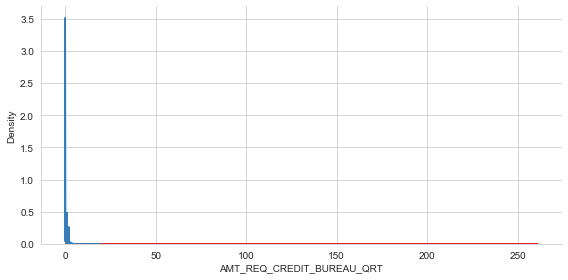

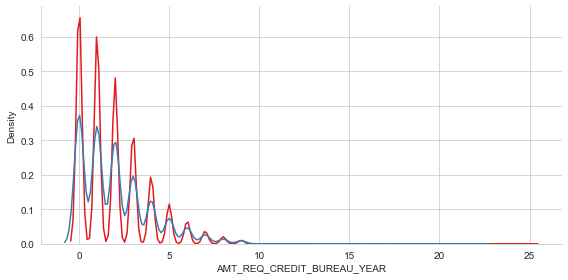

In [229]:
for colu in num_nan_col:
    
    g = sns.FacetGrid(df_application, hue="TARGET", palette="Set1",height=4, aspect=2)
    g.map(sns.kdeplot, colu)
    plt.show()
    

## Imputation des nan 

## Catégoriel

In [230]:
#df_application.loc[:,cat_nan_col] = df_application.loc[:,cat_nan_col].fillna("missing")

## Numérique

In [231]:
imputer = IterativeImputer(estimator = BayesianRidge(), n_nearest_features=None, imputation_order='ascending',skip_complete = True)

In [232]:
# fit on the dataset
imputer.fit(df_application[numeric_col])
# transform the dataset
Xtrans = imputer.transform(df_application[numeric_col])


In [233]:
pd.DataFrame(Xtrans).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 67 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       307511 non-null  float64
 1   1       307511 non-null  float64
 2   2       307511 non-null  float64
 3   3       307511 non-null  float64
 4   4       307511 non-null  float64
 5   5       307511 non-null  float64
 6   6       307511 non-null  float64
 7   7       307511 non-null  float64
 8   8       307511 non-null  float64
 9   9       307511 non-null  float64
 10  10      307511 non-null  float64
 11  11      307511 non-null  float64
 12  12      307511 non-null  float64
 13  13      307511 non-null  float64
 14  14      307511 non-null  float64
 15  15      307511 non-null  float64
 16  16      307511 non-null  float64
 17  17      307511 non-null  float64
 18  18      307511 non-null  float64
 19  19      307511 non-null  float64
 20  20      307511 non-null  float64
 21  21      30

In [234]:
pd.DataFrame(Xtrans).set_axis(numeric_col, axis=1, inplace=False)

SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0         100002.0           0.0          202500.0    406597.5      24700.5   
1         100003.0           0.0          270000.0   1293502.5      35698.5   
2         100004.0           0.0           67500.0    135000.0       6750.0   
3         100006.0           0.0          135000.0    312682.5      29686.5   
4         100007.0           0.0          121500.0    513000.0      21865.5   
...            ...           ...               ...         ...          ...   
307506    456251.0           0.0          157500.0    254700.0      27558.0   
307507    456252.0           0.0           72000.0    269550.0      12001.5   
307508    456253.0           0.0          153000.0    677664.0      29979.0   
307509    456254.0           0.0          171000.0    370107.0      20205.0   
307510    456255.0           0.0          157500.0    675000.0      49117.5   

        AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0              351000.0                    0.018801     -9461.0   
1             1129500.0                    0.003541    -16765.0   
2              135000.0                    0.010032    -19046.0   
3              297000.0                    0.008019    -19005.0   
4              513000.0                    0.028663    -19932.0   
...                 ...                         ...         ...   
307506         225000.0                    0.032561     -9327.0   
307507         225000.0                    0.025164    -20775.0   
307508         585000.0                    0.005002    -14966.0   
307509         319500.0                    0.005313    -11961.0   
307510         675000.0                    0.046220    -16856.0   

        DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0              -637.0            -3648.0          -2120.0    19.471084   
1             -1188.0            -1186.0           -291.0    16.577012   
2              -225.0            -4260.0          -2531.0    26.000000   
3             -3039.0            -9833.0          -2437.0    11.712677   
4             -3038.0            -4311.0          -3458.0    14.209689   
...               ...                ...              ...          ...   
307506         -236.0            -8456.0          -1982.0    15.183180   
307507       365243.0            -4388.0          -4090.0    17.516728   
307508        -7921.0            -6737.0          -5150.0     6.989234   
307509        -4786.0            -2562.0           -931.0    13.894561   
307510        -1262.0            -5128.0           -410.0     6.552253   

        CNT_FAM_MEMBERS  HOUR_APPR_PROCESS_START  EXT_SOURCE_1  EXT_SOURCE_2  \
0                   1.0                     10.0      0.083037      0.262949   
1                   2.0                     11.0      0.311267      0.622246   
2                   1.0                      9.0      0.603147      0.555912   
3                   2.0                     17.0      0.654130      0.650442   
4                   1.0                     11.0      0.649690      0.322738   
...                 ...                      ...           ...           ...   
307506              1.0                     15.0      0.145570      0.681632   
307507              1.0                      8.0      0.583895      0.115992   
307508              1.0                      9.0      0.744026      0.535722   
307509              2.0                      9.0      0.398868      0.514163   
307510              2.0                     20.0      0.734460      0.708569   

        EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
0           0.139376        0.024700          0.036900   
1           0.452989        0.095900          0.052900   
2           0.729567        0.117404          0.088099   
3           0.545973        0.117423          0.088046   
4           0.548423        0.117492          0.088384   
...              ...             ...               ...  

In [235]:
df_application = df_application.drop(columns = numeric_col)

In [239]:
df_merged = df_application.join(trans_pd, how="inner" )

In [240]:
df_merged

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0           1         Cash loans           M            N               Y   
1           0         Cash loans           F            N               N   
2           0    Revolving loans           M            Y               Y   
3           0         Cash loans           F            N               Y   
4           0         Cash loans           M            N               Y   
...       ...                ...         ...          ...             ...   
307506      0         Cash loans           M            N               N   
307507      0         Cash loans           F            N               Y   
307508      0         Cash loans           F            N               Y   
307509      1         Cash loans           F            N               Y   
307510      0         Cash loans           F            N               N   

       NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0        Unaccompanied               Working  Secondary / secondary special   
1               Family         State servant               Higher education   
2        Unaccompanied               Working  Secondary / secondary special   
3        Unaccompanied               Working  Secondary / secondary special   
4        Unaccompanied               Working  Secondary / secondary special   
...                ...                   ...                            ...   
307506   Unaccompanied               Working  Secondary / secondary special   
307507   Unaccompanied             Pensioner  Secondary / secondary special   
307508   Unaccompanied               Working               Higher education   
307509   Unaccompanied  Commercial associate  Secondary / secondary special   
307510   Unaccompanied  Commercial associate               Higher education   

          NAME_FAMILY_STATUS  NAME_HOUSING_TYPE FLAG_MOBIL FLAG_EMP_PHONE  \
0       Single / not married  House / apartment          1              1   
1                    Married  House / apartment          1              1   
2       Single / not married  House / apartment          1              1   
3             Civil marriage  House / apartment          1              1   
4       Single / not married  House / apartment          1              1   
...                      ...                ...        ...            ...   
307506             Separated       With parents          1              1   
307507                 Widow  House / apartment          1              0   
307508             Separated  House / apartment          1              1   
307509               Married  House / apartment          1              1   
307510               Married  House / apartment          1              1   

       FLAG_WORK_PHONE FLAG_CONT_MOBILE FLAG_PHONE FLAG_EMAIL OCCUPATION_TYPE  \
0                    0                1          1          0        Laborers   
1                    0                1          1          0      Core staff   
2                    1                1          1          0        Laborers   
3                    0                1          0          0        Laborers   
4                    0                1          0          0      Core staff   
...                ...              ...        ...        ...             ...   
307506               0                1          0          0     Sales staff   
307507               0                1          1          0             NaN   
307508               0                1          0          1        Managers   
307509               0                1          0          0        Laborers   
307510               1                1          1          0        Laborers   

       REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY  \
0                         2                           2   
1                         1                           1   
2                         2                           2   

In [241]:
df_merged.to_csv(r'C:\\Users\\alojou\\Notebook Python\\Projet_7 Modèle de scoring\\Data\\df_clean.csv')

In [242]:
#open the dataframe

df_application = pd.read_csv(r'C:\\Users\\alojou\\Notebook Python\\Projet_7 Modèle de scoring\\Data\\df_clean.csv')

In [243]:
df_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 123 entries, Unnamed: 0 to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(70), int64(37), object(16)
memory usage: 288.6+ MB


In [245]:
category_features = []
threshold = 10
for each in df_application.columns:
    if df_application[each].nunique() < threshold:
        category_features.append(each)

print("transformed from numerical to categorical : ",category_features)   
        
        
for each in category_features:
    df_application[each] = df_application[each].astype('category')

obj_col = df_application.select_dtypes("object").columns
for each in obj_col:
    df_application[each] = df_application[each].astype('category')

transformed from numerical to categorical :  ['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DO

In [246]:
# split dtypes for futur analysis
numeric_col = df_application.select_dtypes(np.number).columns
cat_col = df_application.select_dtypes("category").columns

In [247]:
df_application[numeric_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 68 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    307511 non-null  int64  
 1   ID                            307511 non-null  int64  
 2   CNT_CHILDREN                  307511 non-null  float64
 3   AMT_INCOME_TOTAL              307511 non-null  float64
 4   AMT_CREDIT                    307511 non-null  float64
 5   AMT_ANNUITY                   307511 non-null  float64
 6   AMT_GOODS_PRICE               307511 non-null  float64
 7   REGION_POPULATION_RELATIVE    307511 non-null  float64
 8   DAYS_BIRTH                    307511 non-null  float64
 9   DAYS_EMPLOYED                 307511 non-null  float64
 10  DAYS_REGISTRATION             307511 non-null  float64
 11  DAYS_ID_PUBLISH               307511 non-null  float64
 12  OWN_CAR_AGE                   307511 non-nul

### Univariate analyis

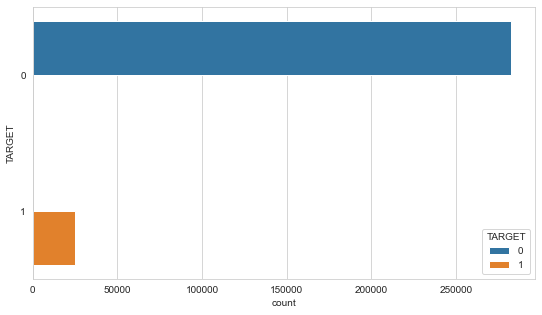

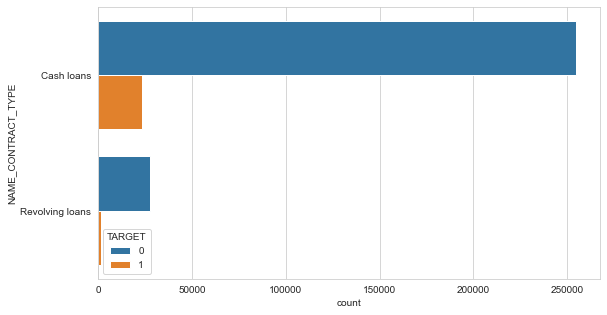

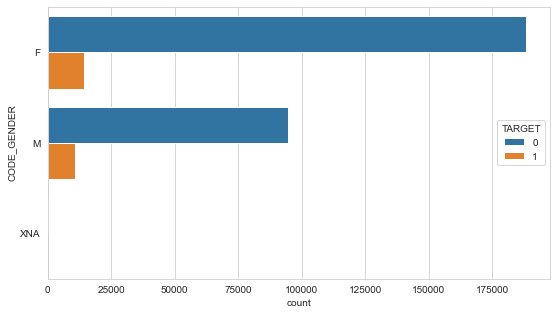

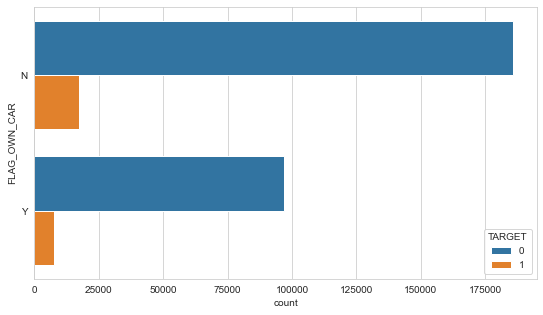

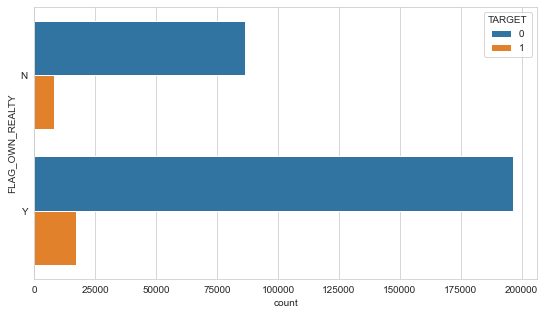

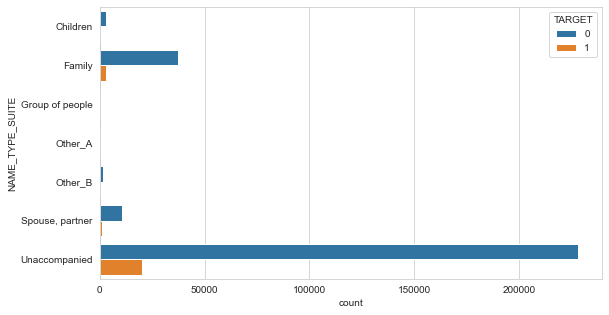

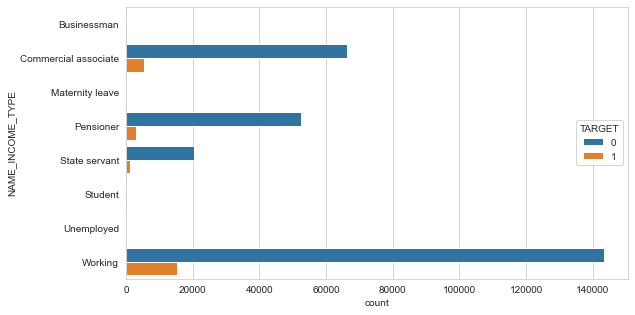

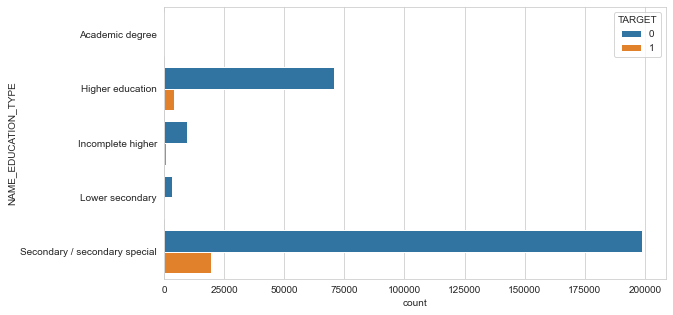

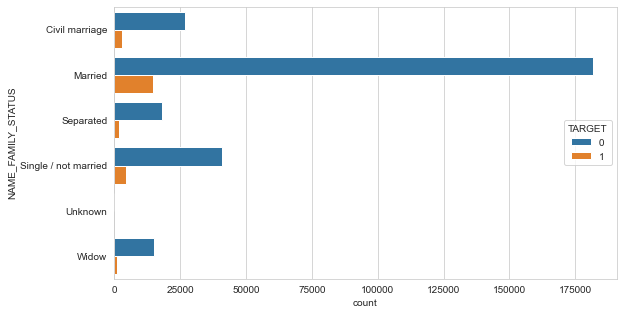

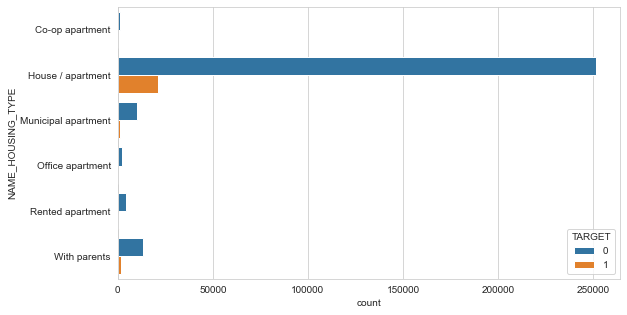

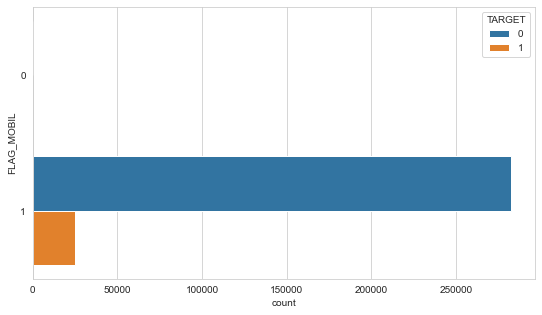

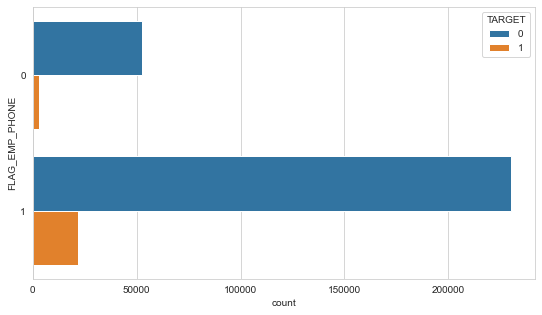

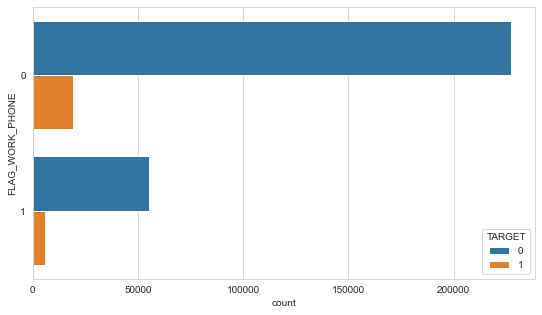

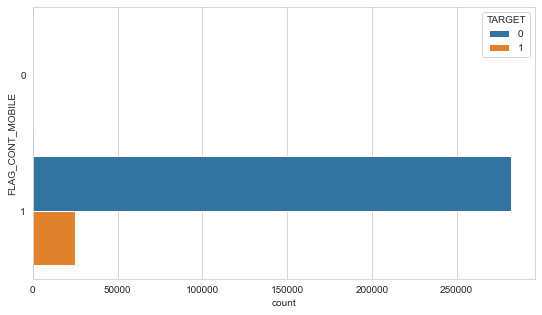

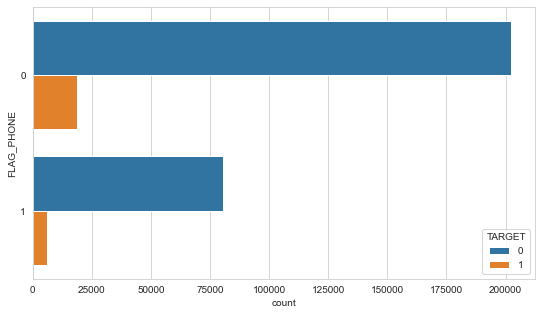

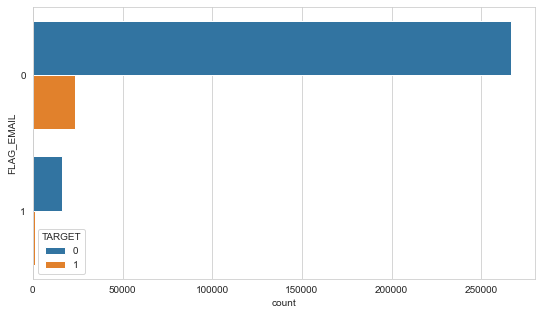

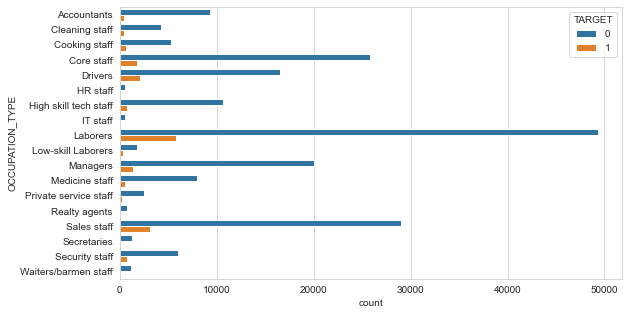

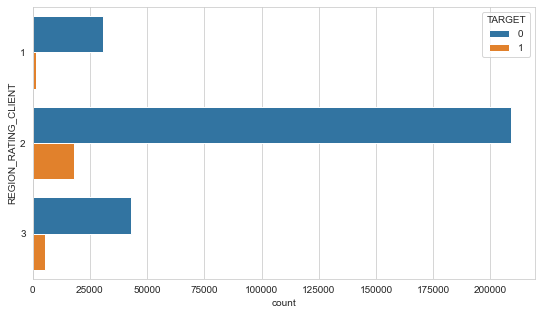

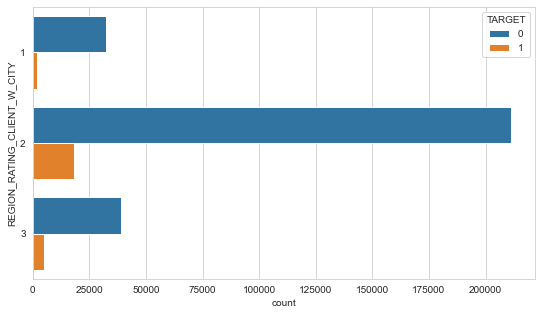

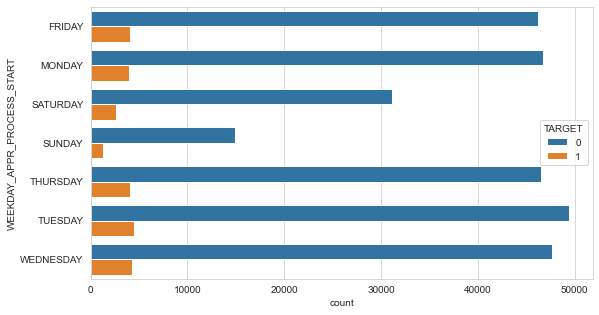

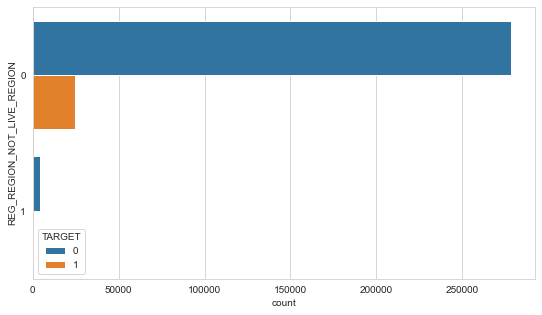

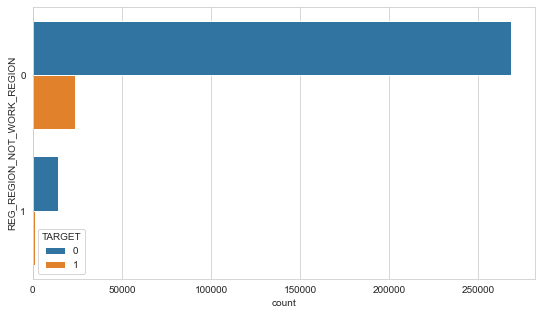

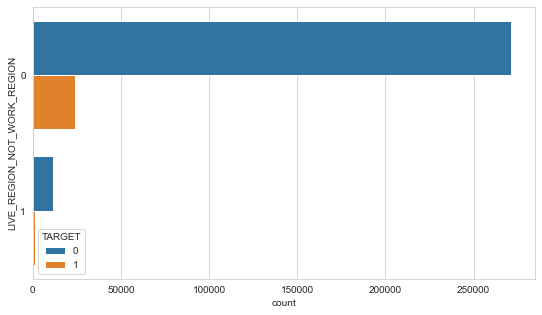

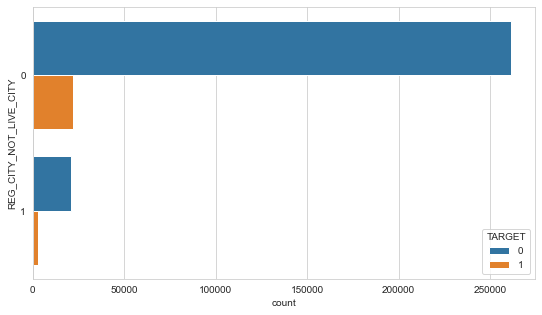

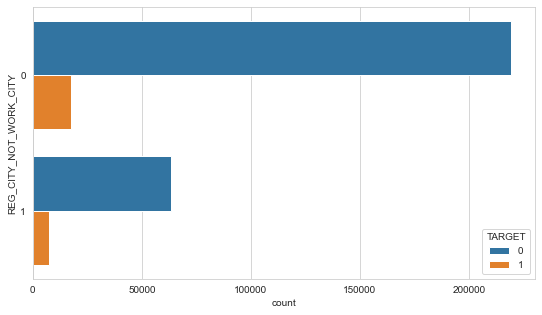

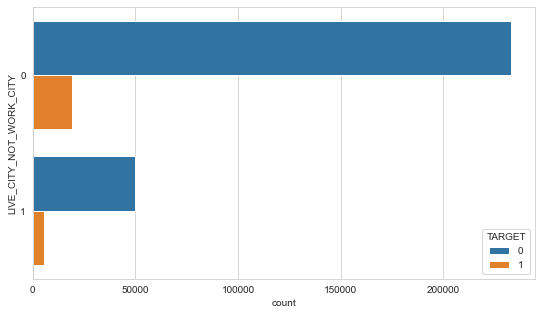

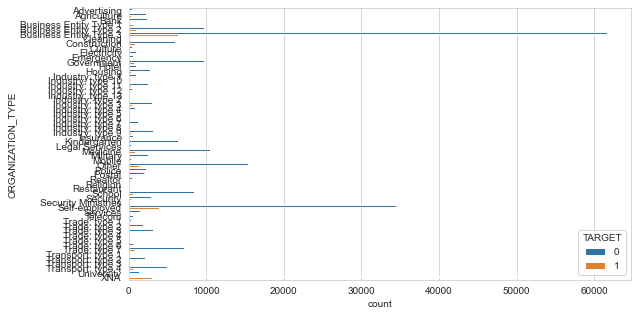

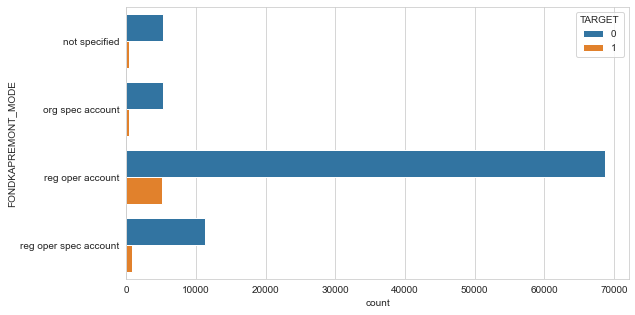

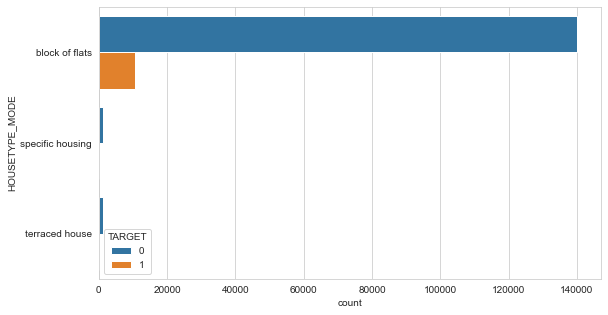

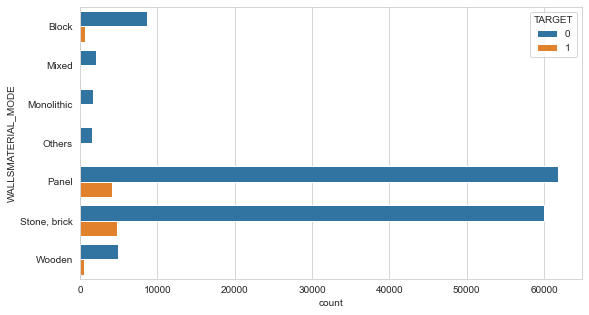

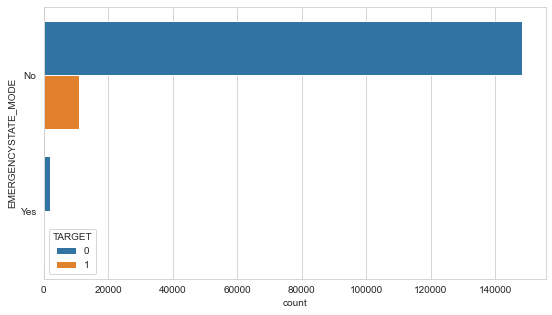

c:\users\alojou\appdata\local\programs\python\python39\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
c:\users\alojou\appdata\local\programs\python\python39\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
c:\users\alojou\appdata\local\programs\python\python39\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
c:\users\alojou\appdata\local\programs\python\python39\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version thi

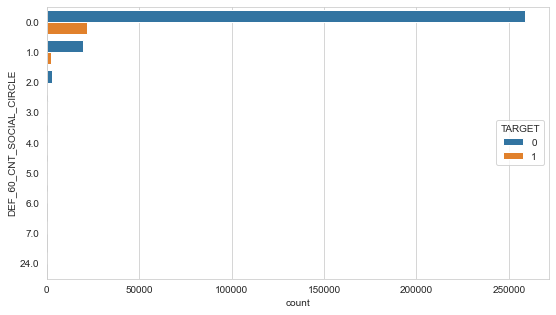

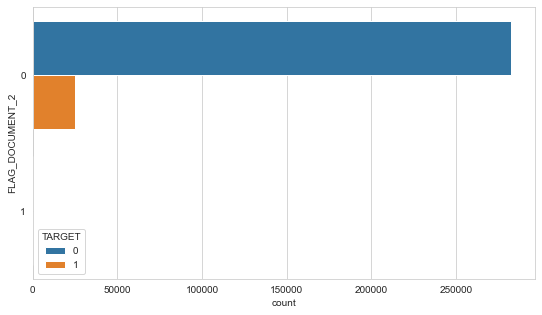

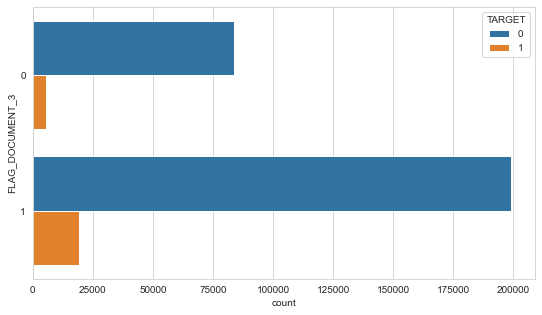

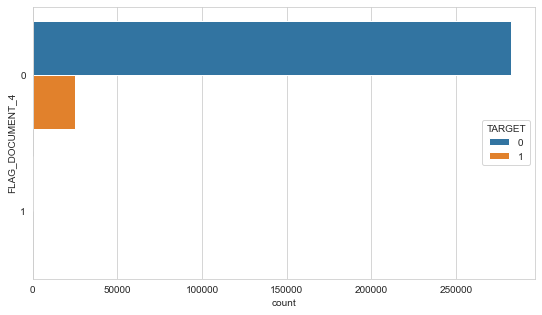

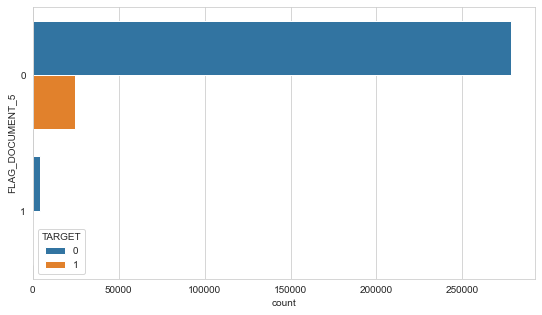

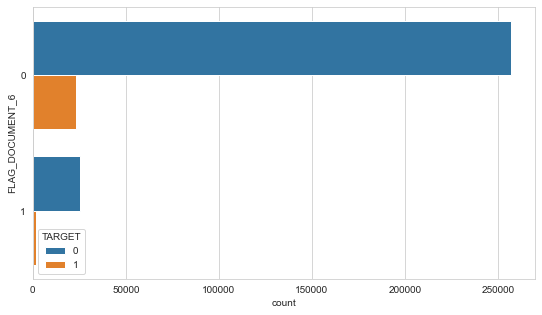

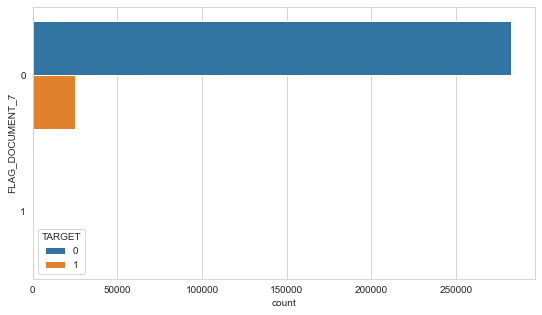

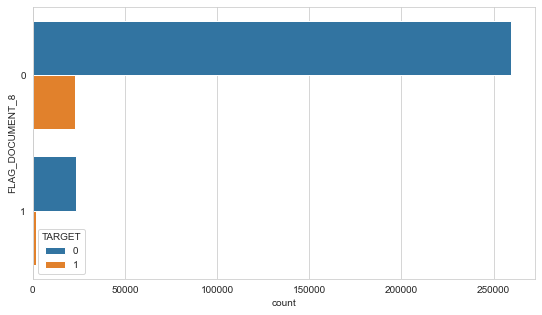

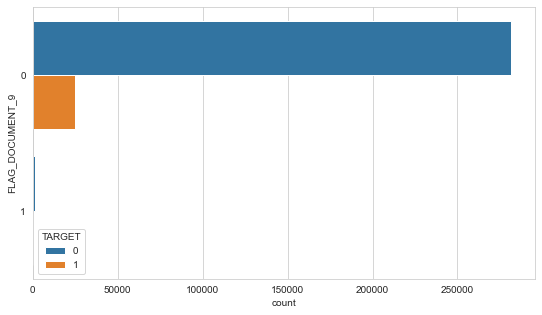

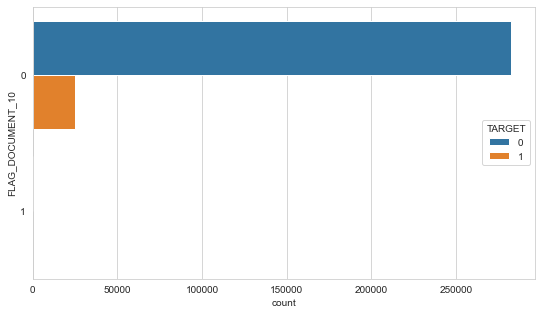

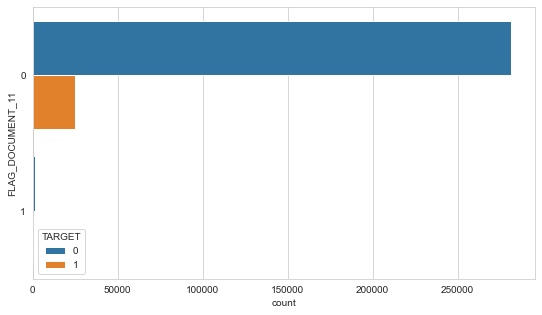

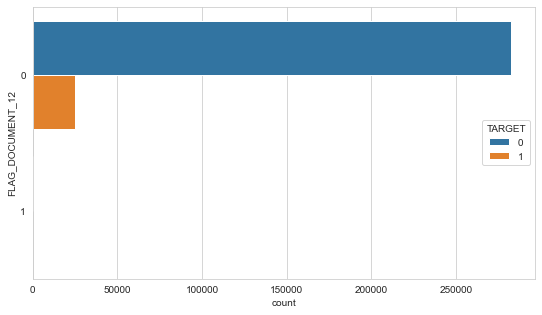

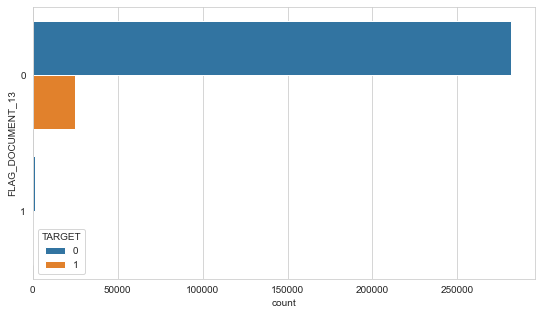

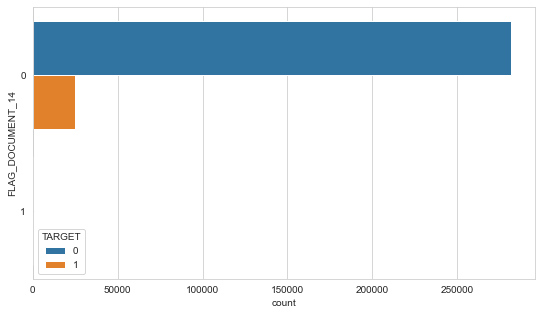

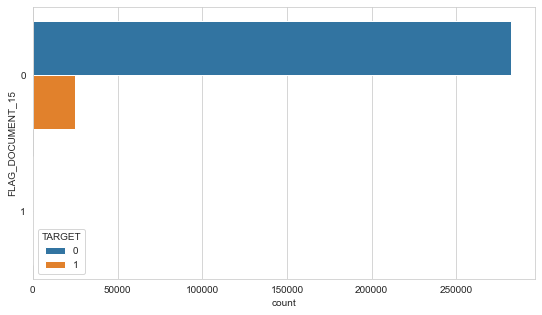

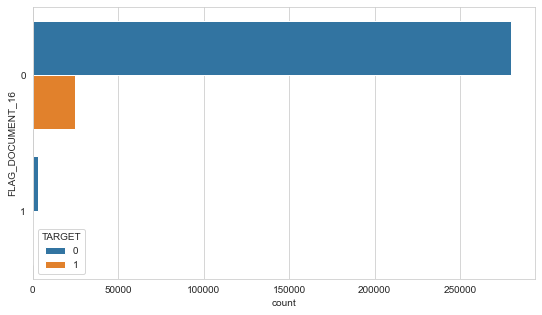

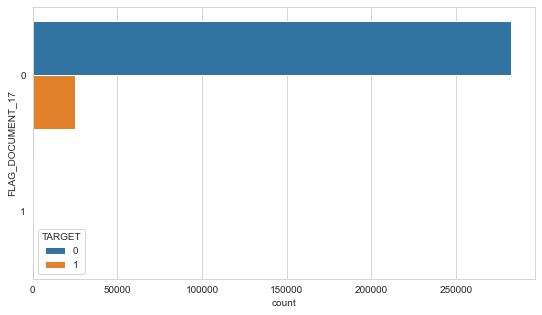

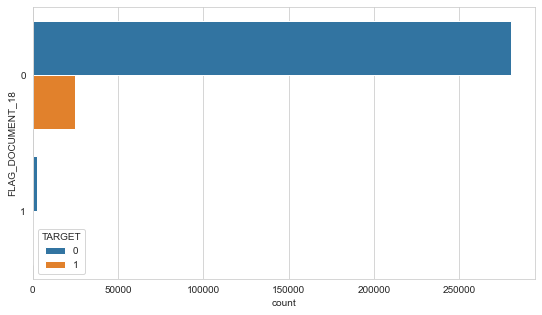

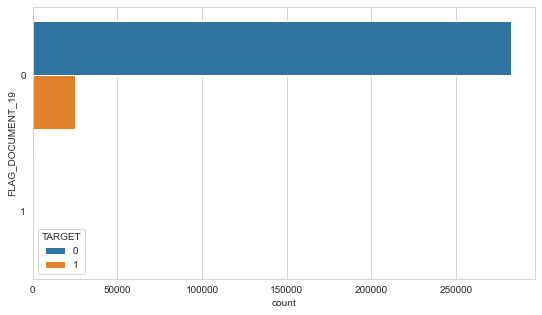

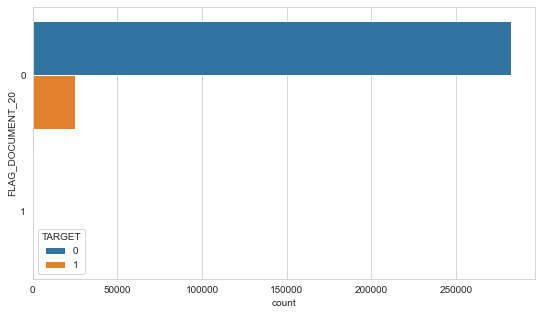

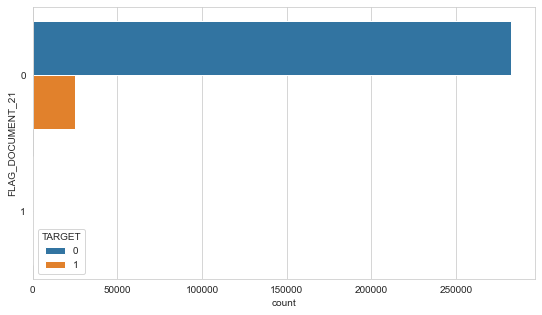

c:\users\alojou\appdata\local\programs\python\python39\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
c:\users\alojou\appdata\local\programs\python\python39\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


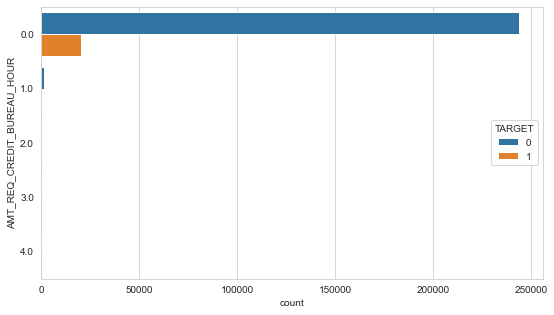

c:\users\alojou\appdata\local\programs\python\python39\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
c:\users\alojou\appdata\local\programs\python\python39\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
c:\users\alojou\appdata\local\programs\python\python39\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
c:\users\alojou\appdata\local\programs\python\python39\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version thi

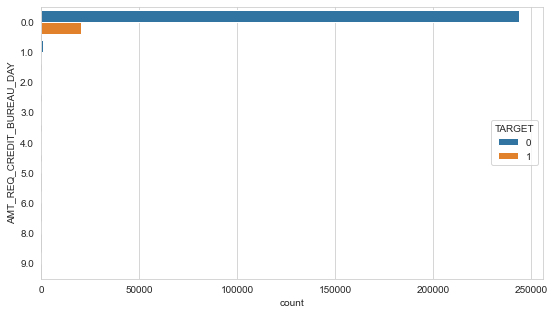

c:\users\alojou\appdata\local\programs\python\python39\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
c:\users\alojou\appdata\local\programs\python\python39\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
c:\users\alojou\appdata\local\programs\python\python39\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
c:\users\alojou\appdata\local\programs\python\python39\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version thi

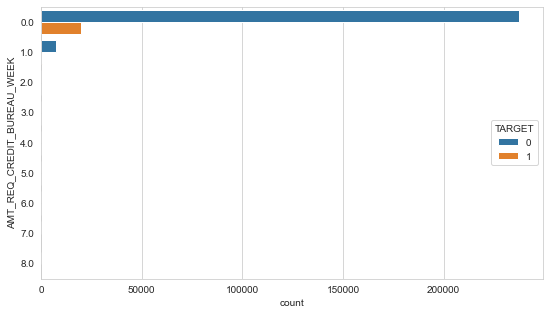

In [73]:
for colu in cat_col:
    plt.figure(figsize=(9, 5))
    ax = sns.countplot(y=colu, hue="TARGET",data=df_application)
    plt.show()

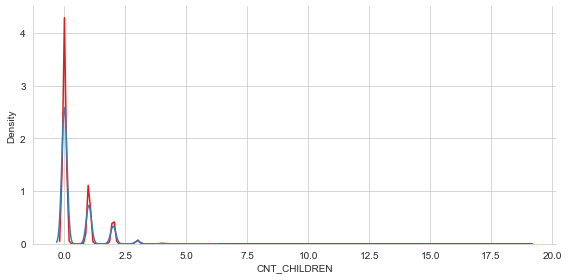

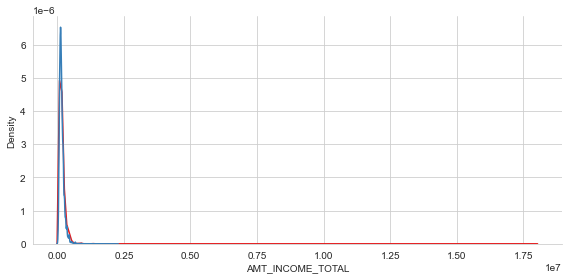

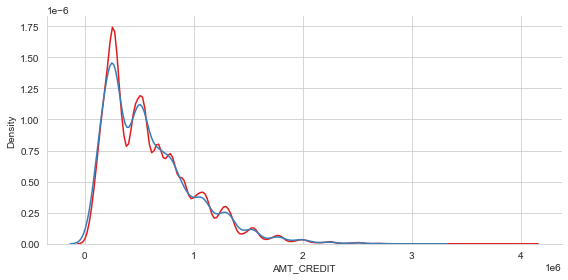

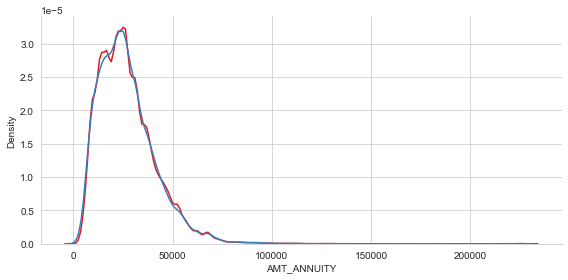

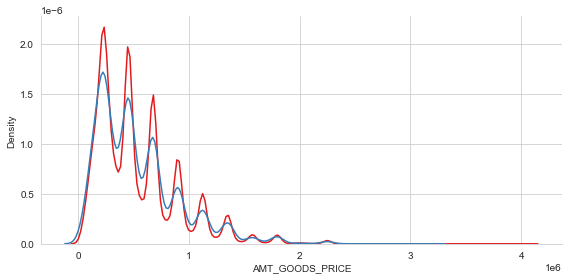

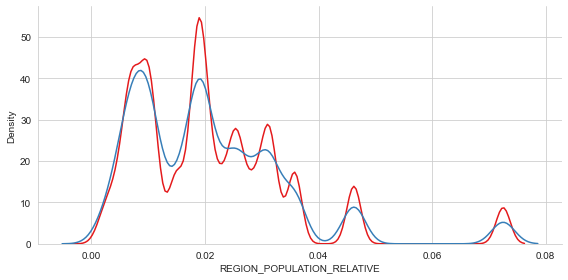

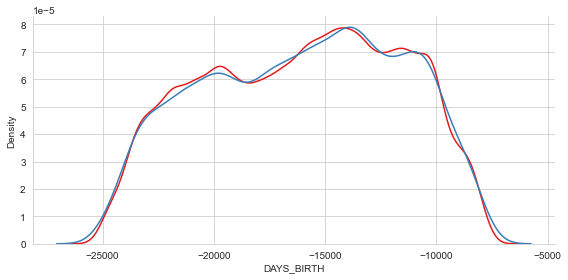

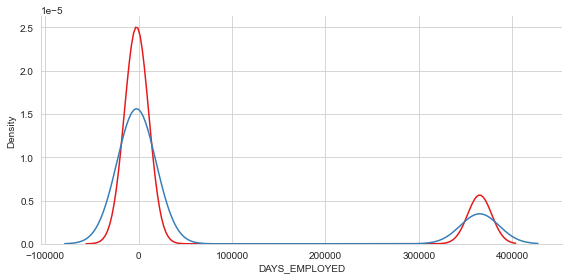

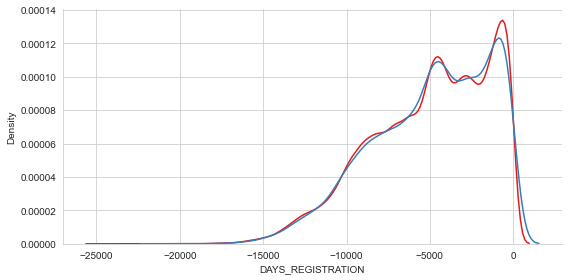

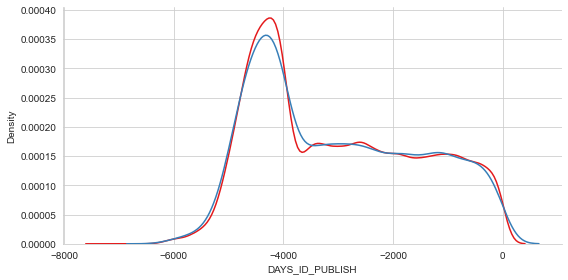

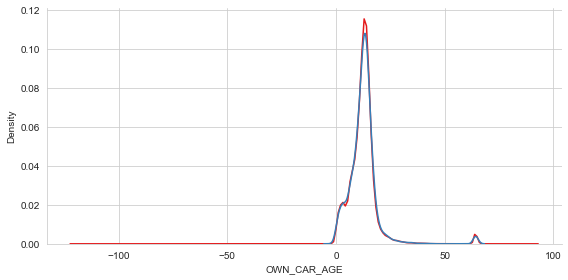

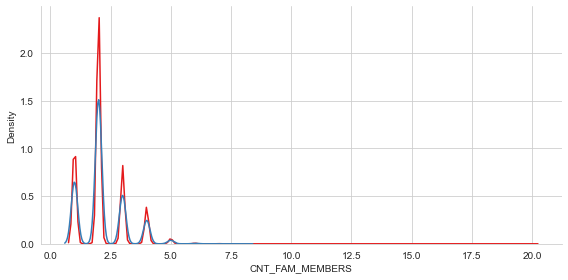

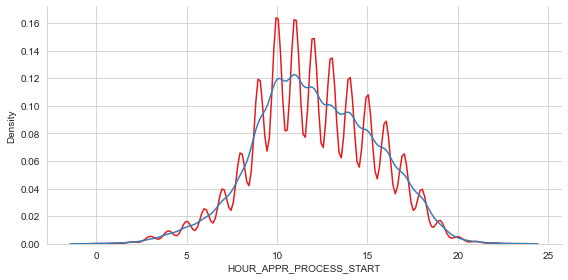

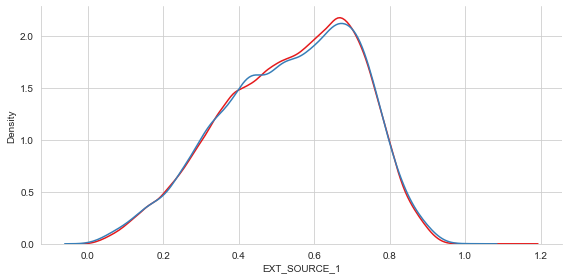

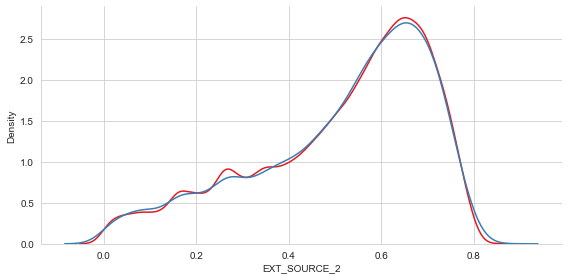

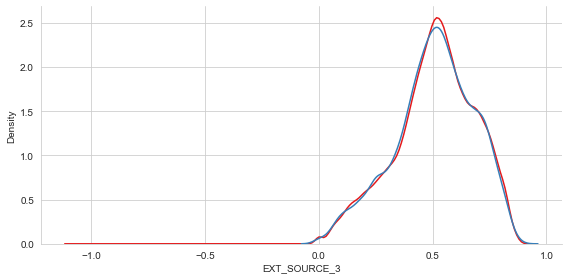

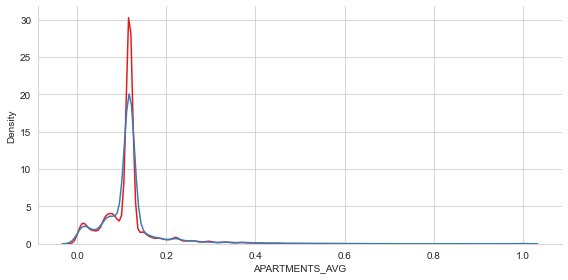

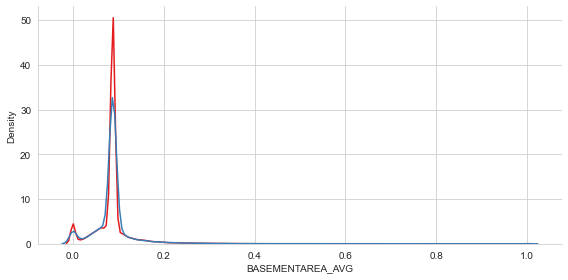

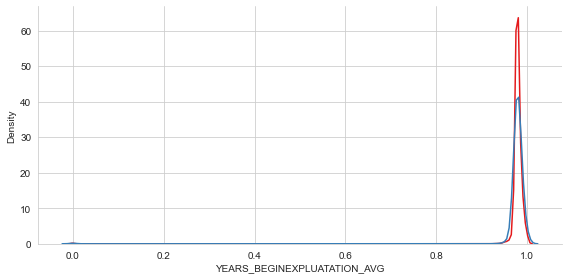

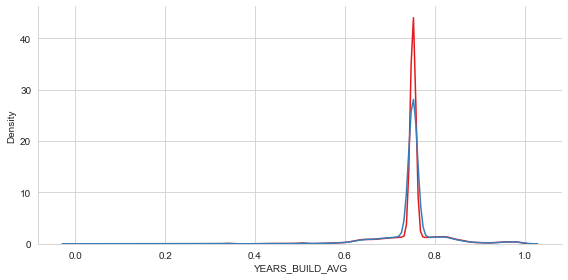

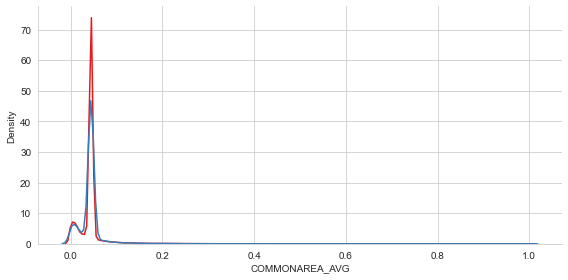

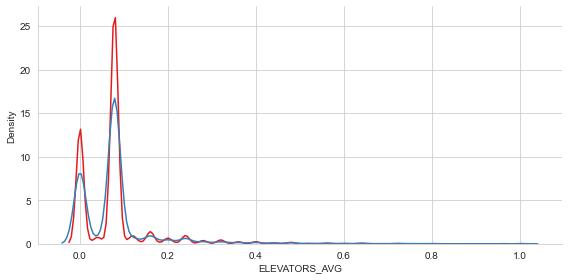

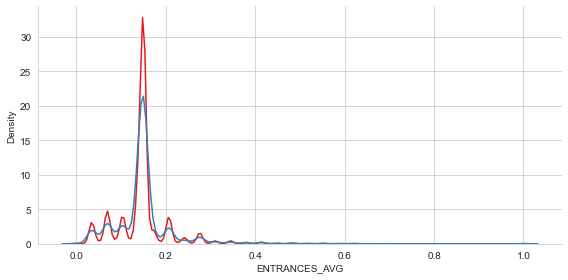

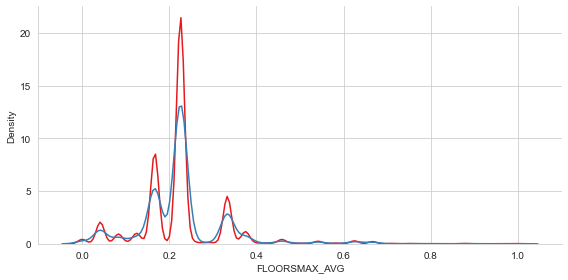

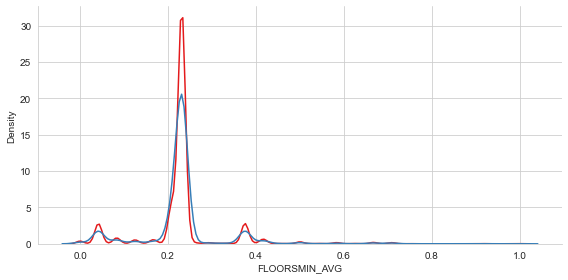

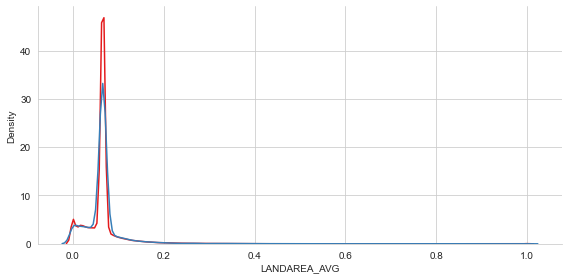

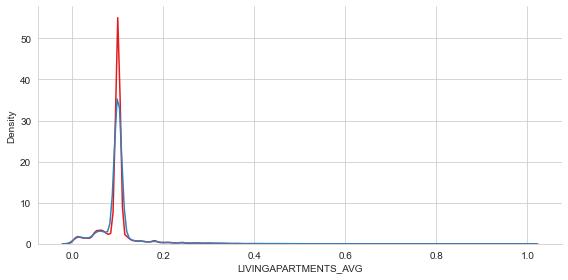

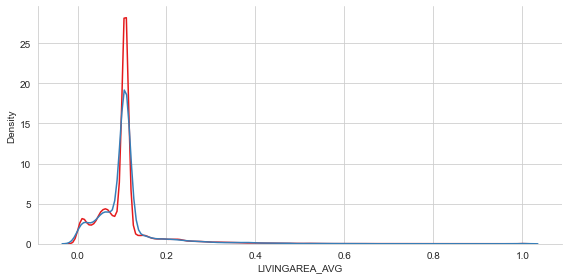

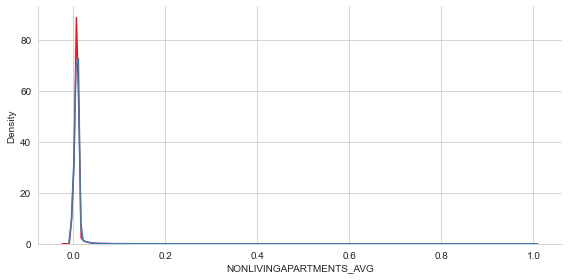

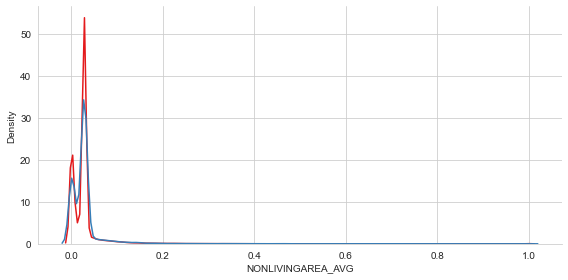

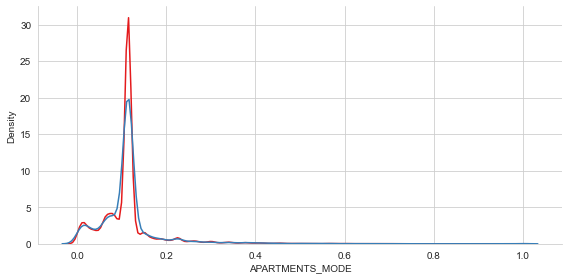

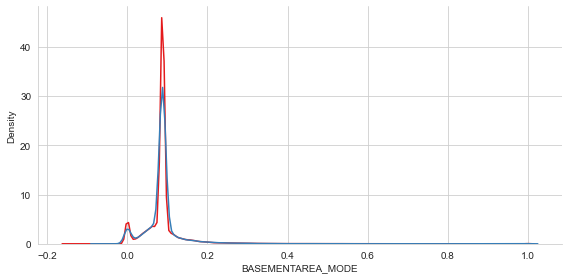

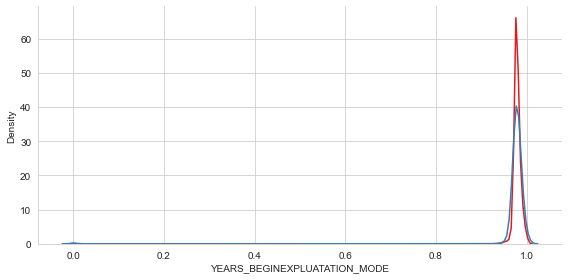

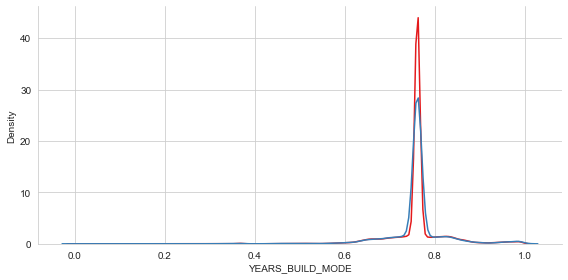

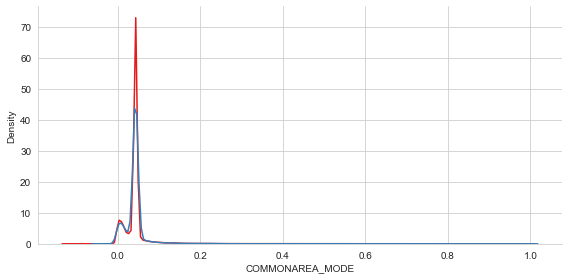

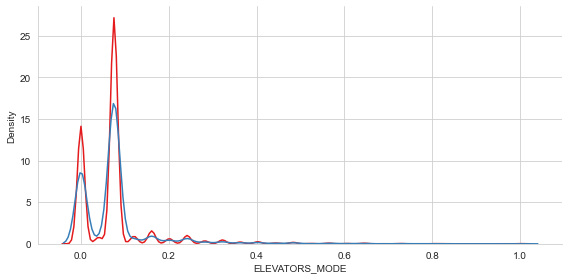

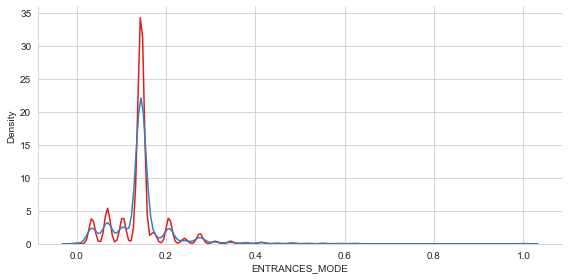

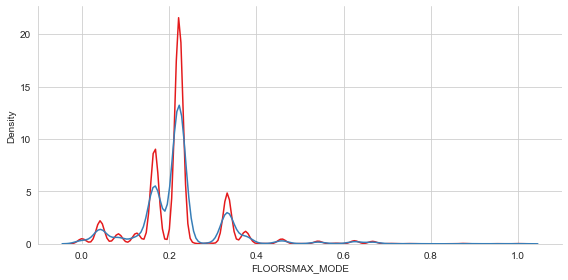

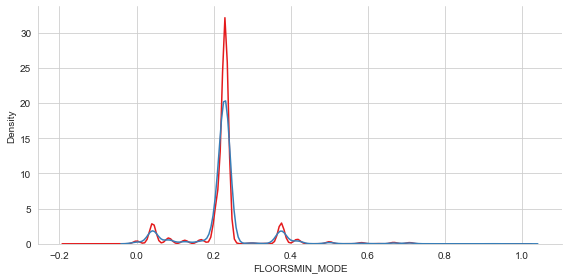

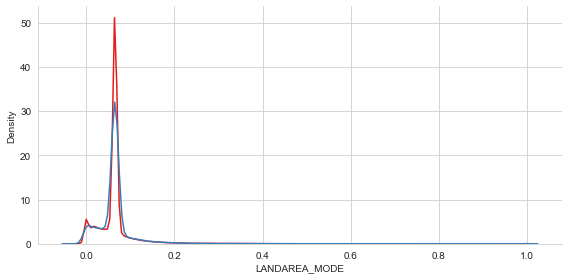

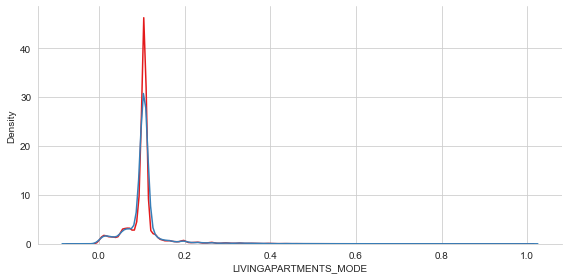

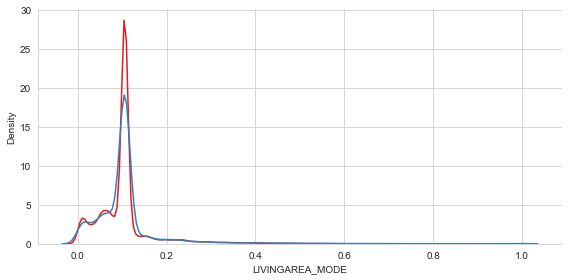

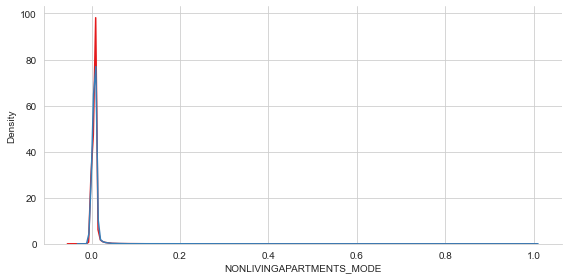

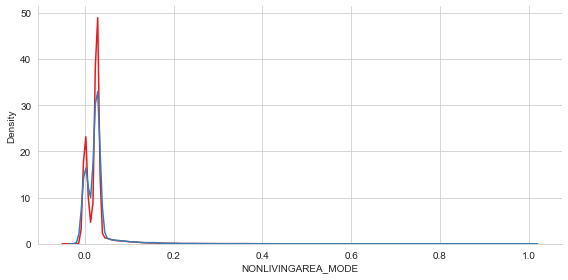

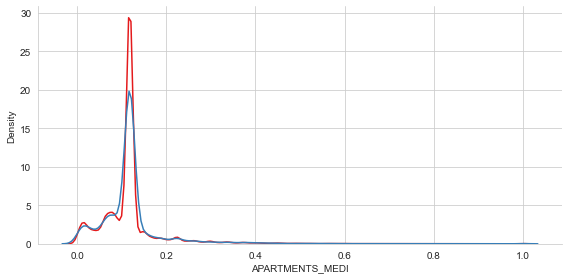

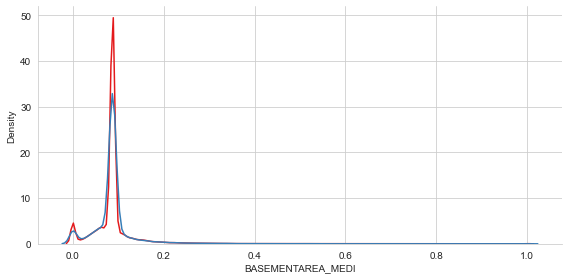

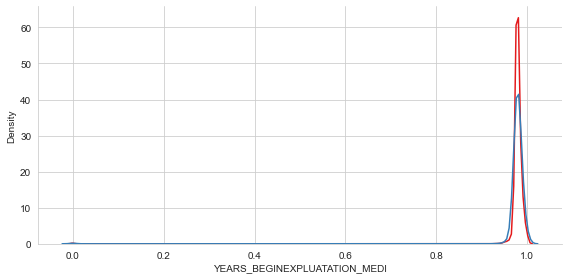

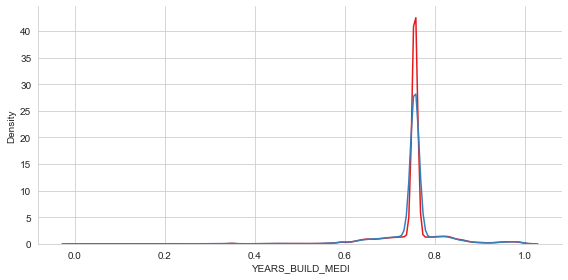

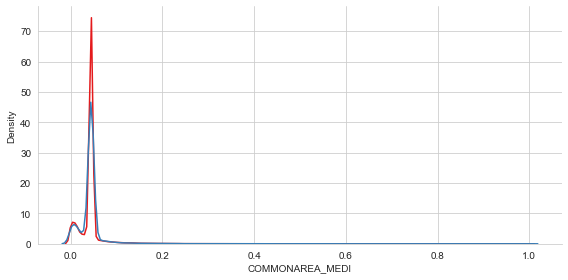

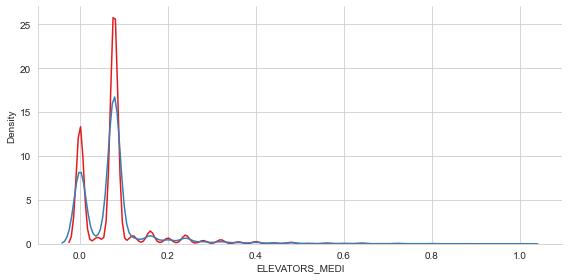

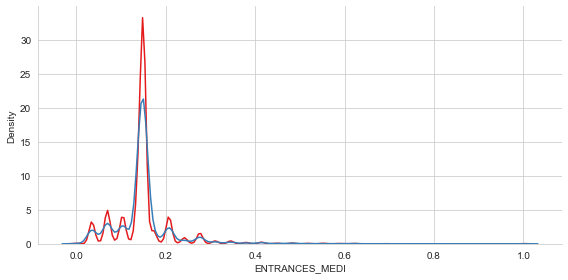

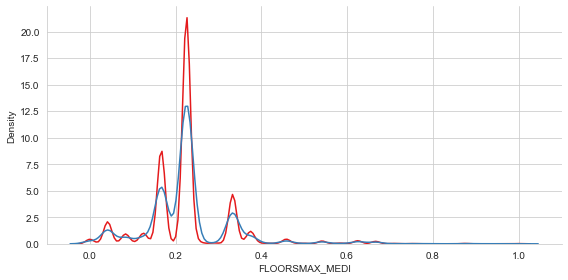

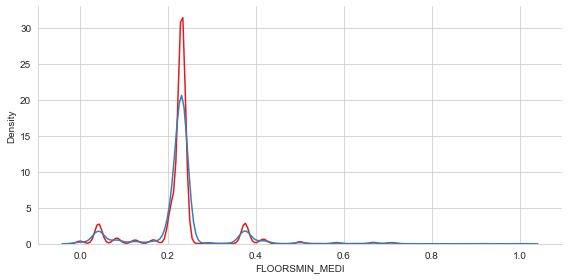

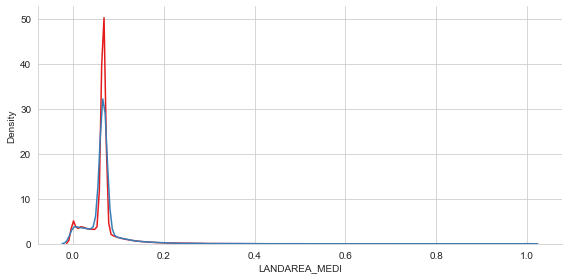

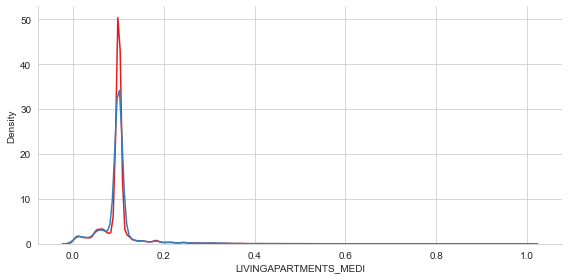

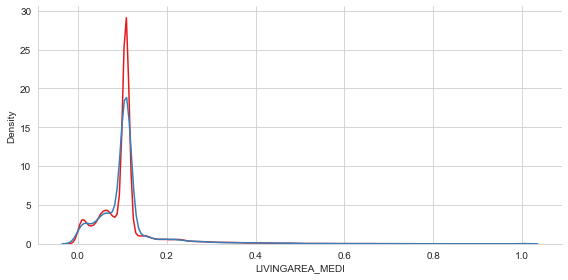

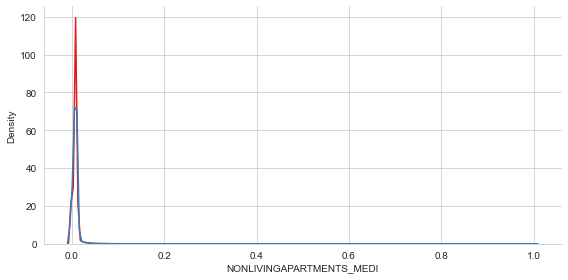

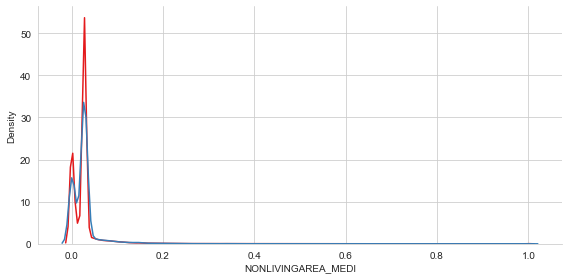

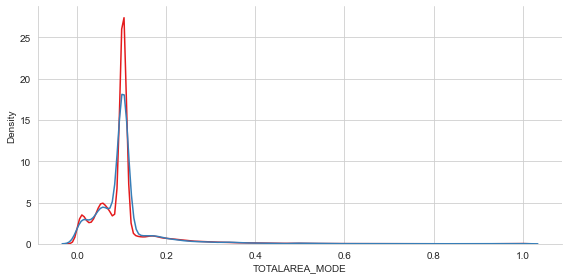

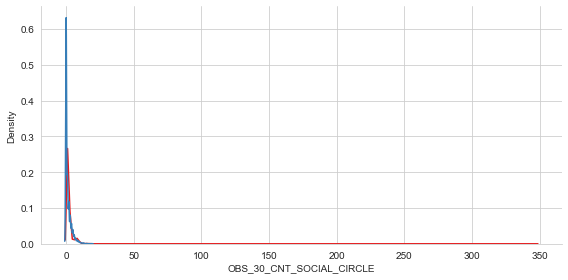

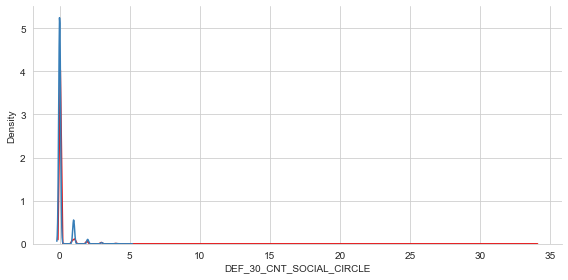

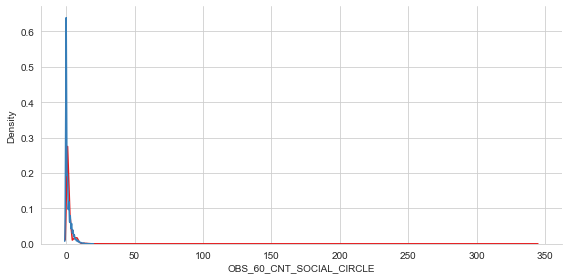

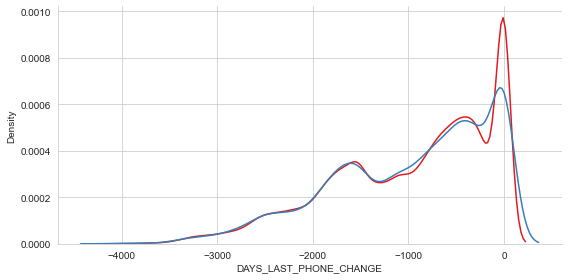

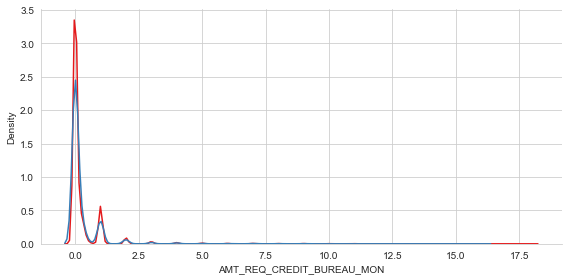

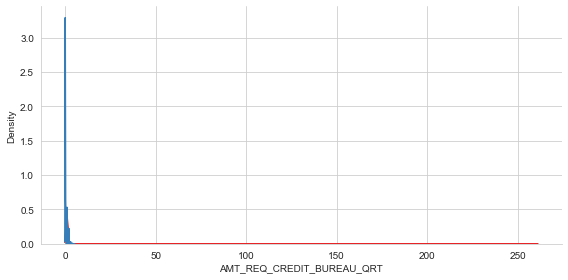

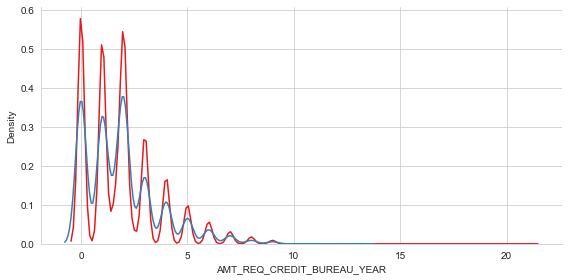

In [74]:
for colu in numeric_col:
    
    g = sns.FacetGrid(df_application, hue="TARGET", palette="Set1",height=4, aspect=2)
    g.map(sns.kdeplot, colu)
    plt.show()
    

## Multivariate analysis 

#### a revoir pd.scatter_matrix pour distinguer les relation linéaire et non linéaire

In [75]:
#pairplot
#pd.plotting.scatter_matrix(df_application[numeric_col],hist_kwds={'bins':30})

In [248]:
corr_df_p = df_application.corr(method='pearson')
corr_df_s = df_application.corr(method='spearman')

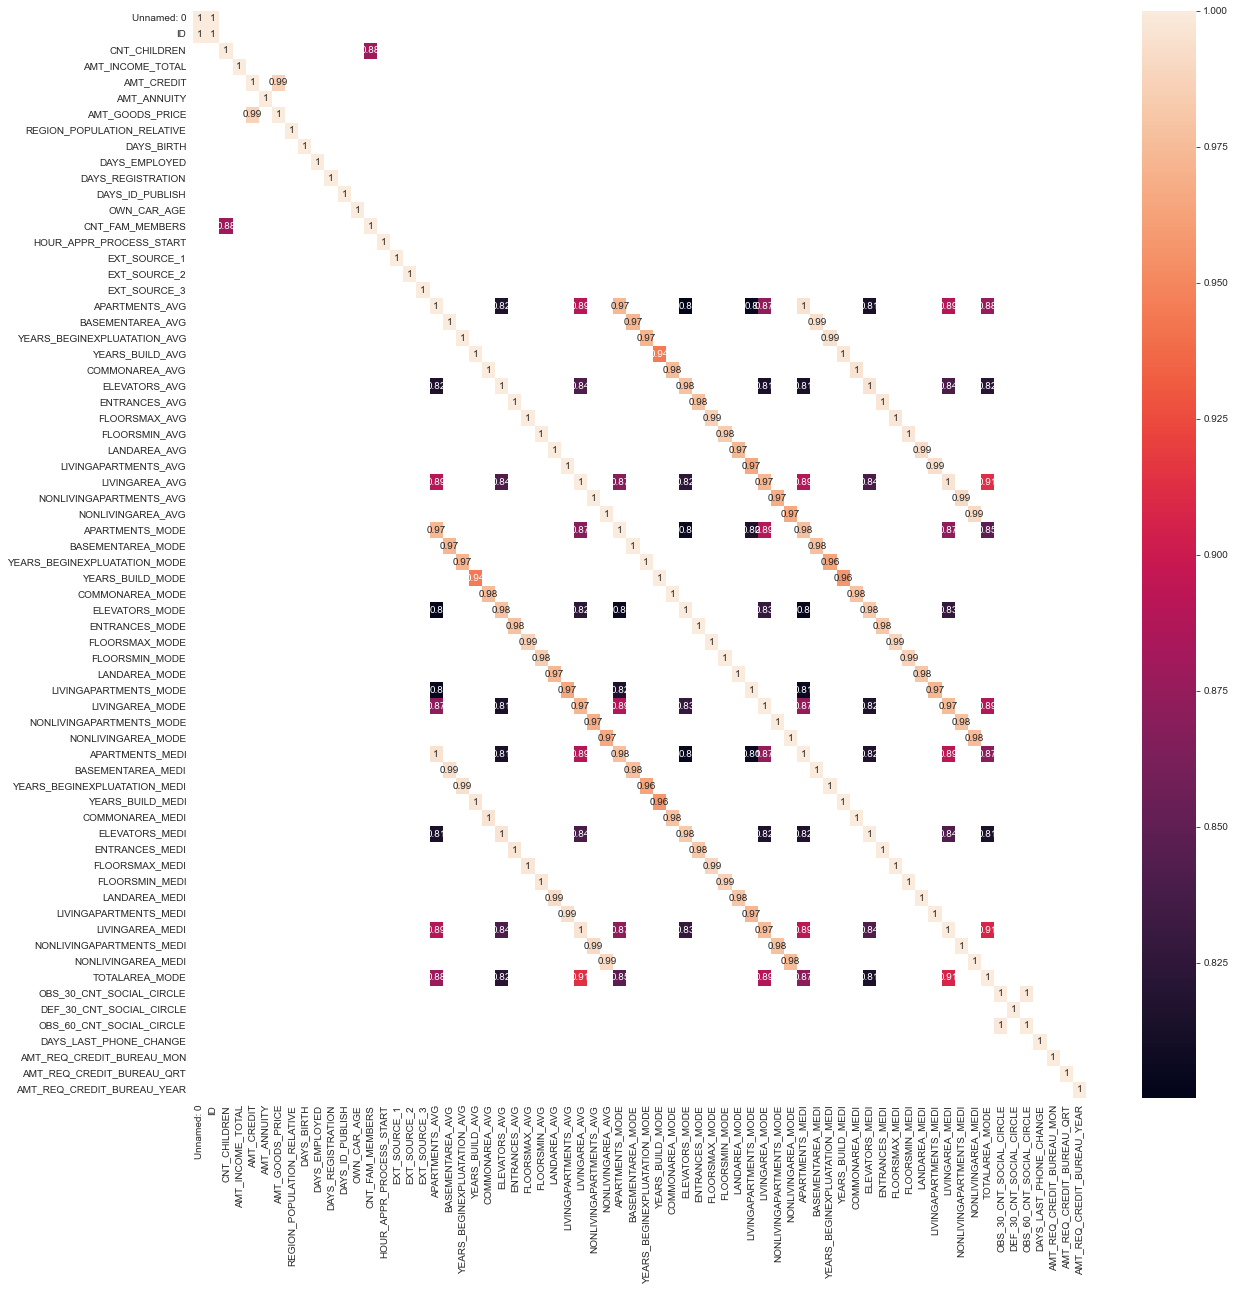

In [249]:
plt.figure(figsize=(20,20))
sns.heatmap(corr_df_p[corr_df_p>0.8], annot=True)
plt.show()

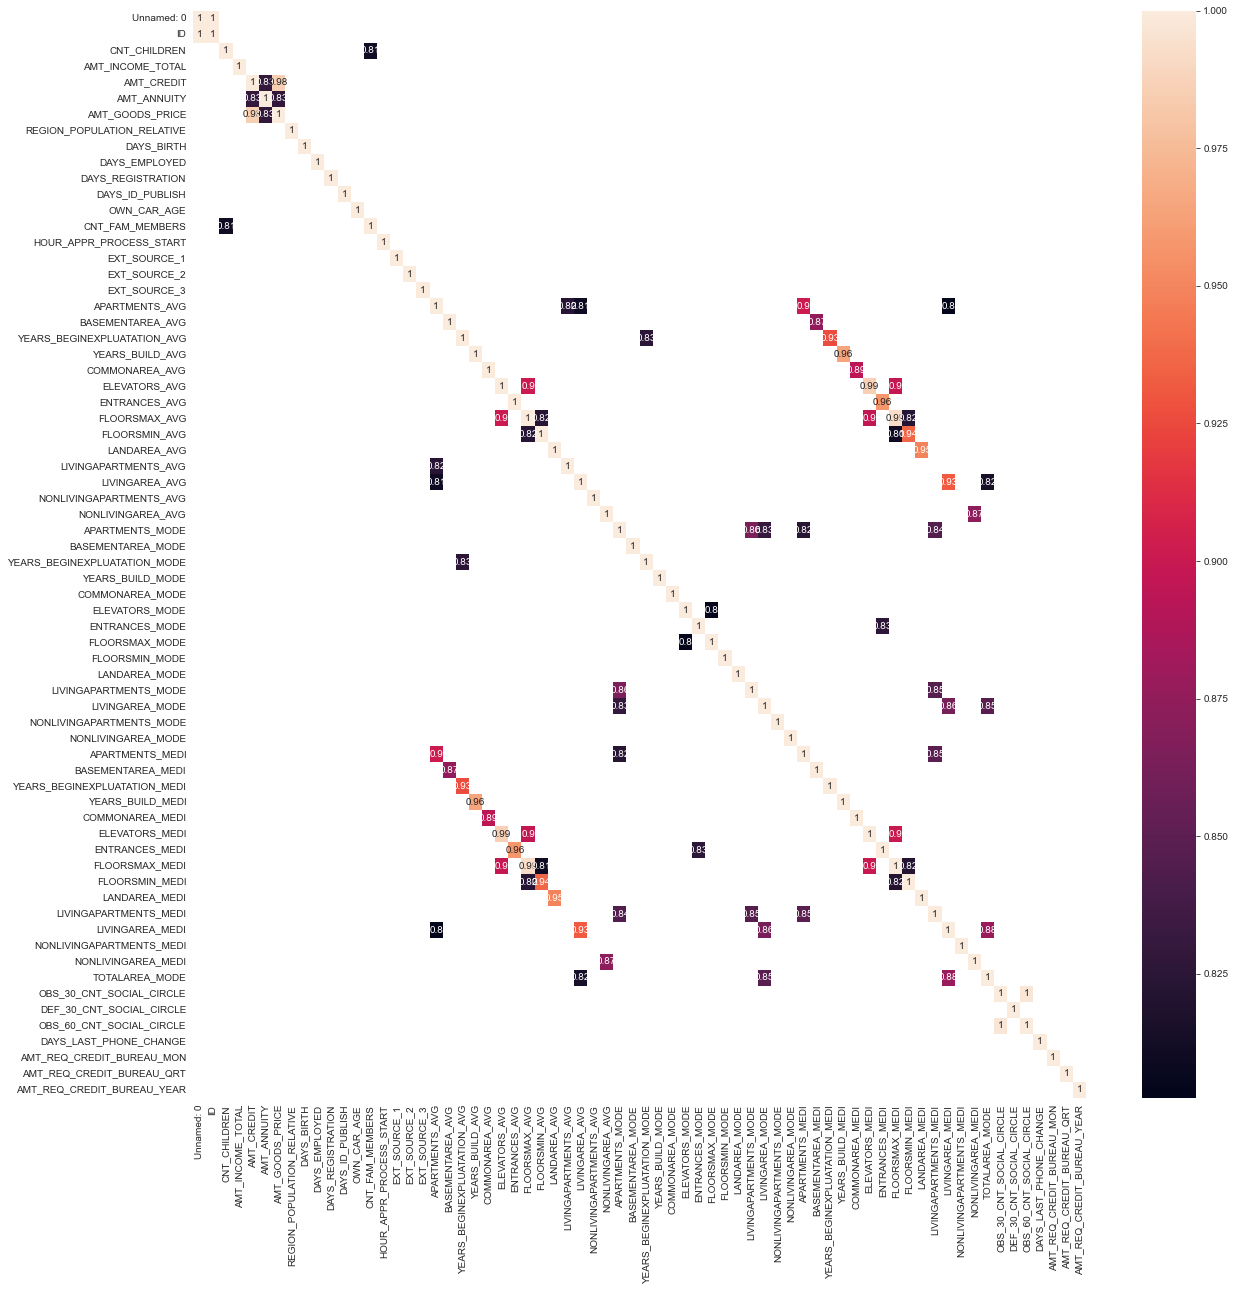

In [250]:
plt.figure(figsize=(20,20))
sns.heatmap(corr_df_s[corr_df_s>0.8], annot=True)
plt.show()

### drop correlated columns

In [251]:
import numpy as np

# Create correlation matrix
corr_matrix = df_application.corr(method='spearman').abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

print("columns removed : ",to_drop)

# Drop features 
df_application.drop(to_drop, axis=1, inplace=True)

columns removed :  ['ID', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE', 'OBS_60_CNT_SOCIAL_CIRCLE']


In [252]:
#update numeric column 
numeric_col = [col for col in numeric_col if col not in to_drop]

## Statistical test 

In [253]:
df_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 96 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   Unnamed: 0                   307511 non-null  int64   
 1   TARGET                       307511 non-null  category
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  category
 5   FLAG_OWN_REALTY              307511 non-null  category
 6   NAME_TYPE_SUITE              306219 non-null  category
 7   NAME_INCOME_TYPE             307511 non-null  category
 8   NAME_EDUCATION_TYPE          307511 non-null  category
 9   NAME_FAMILY_STATUS           307511 non-null  category
 10  NAME_HOUSING_TYPE            307511 non-null  category
 11  FLAG_MOBIL                   307511 non-null  category
 12  FLAG_EMP_PHONE               307511 non-null

### Boxplot

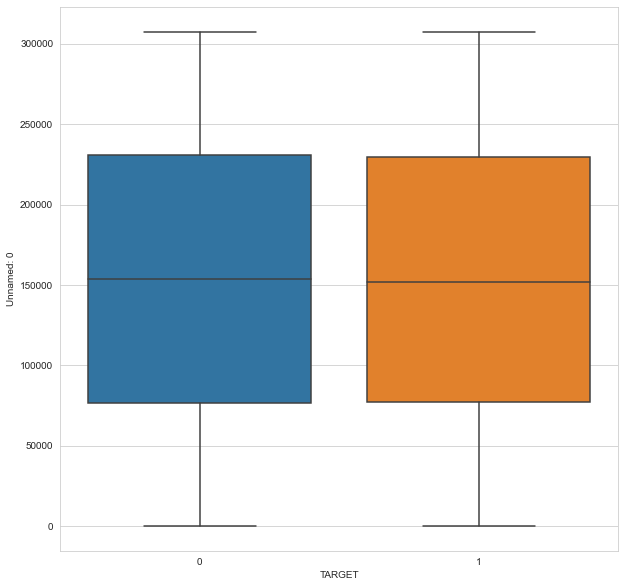

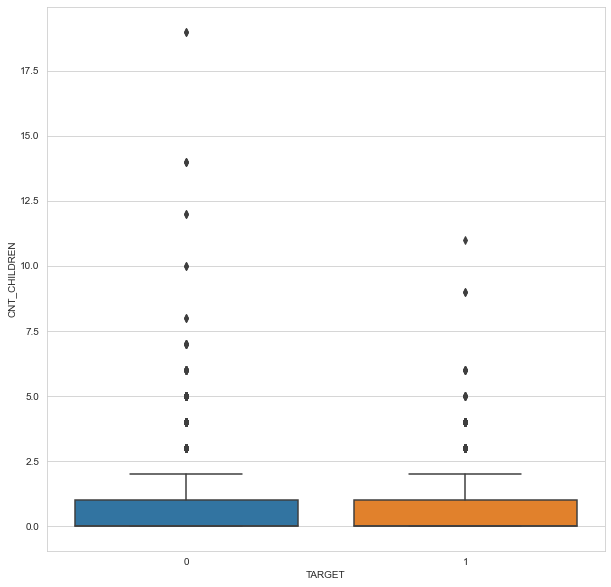

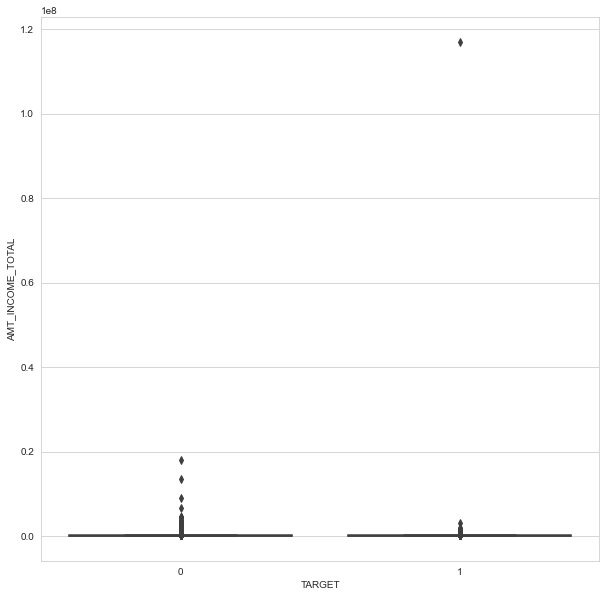

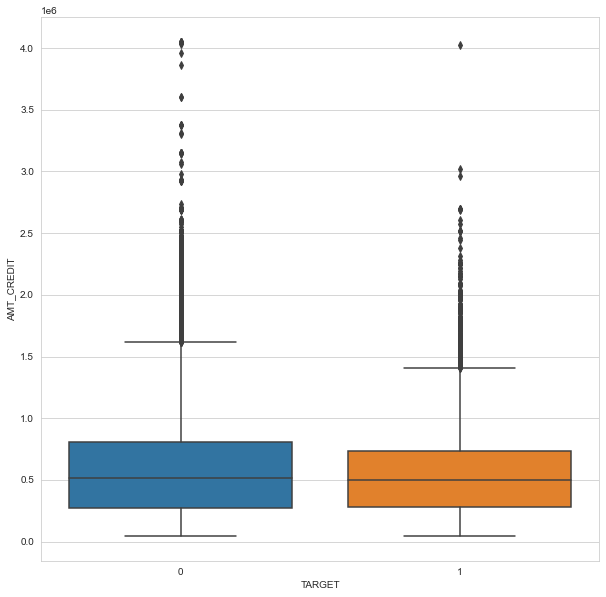

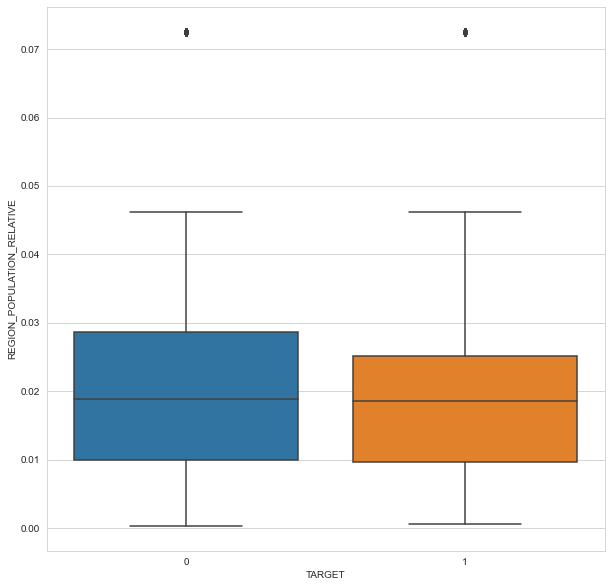

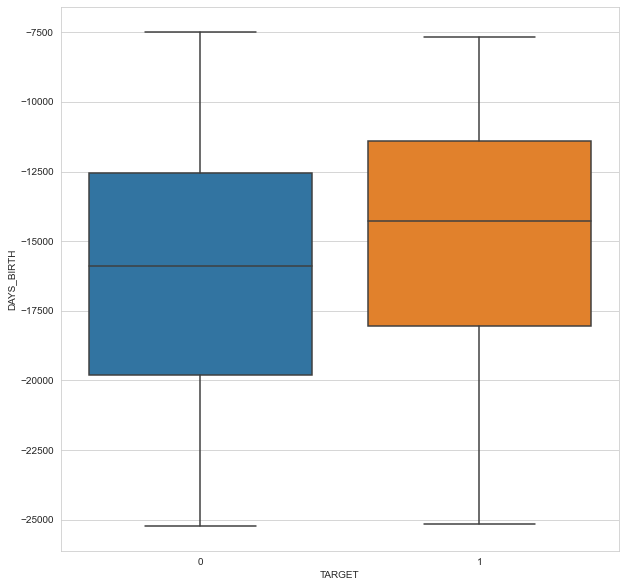

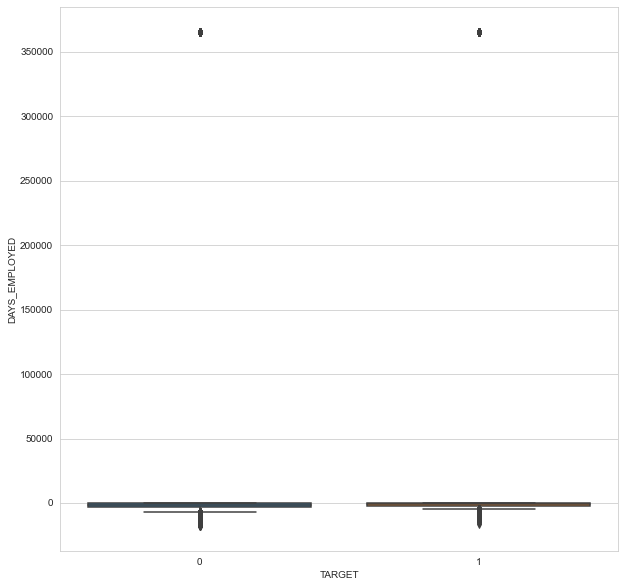

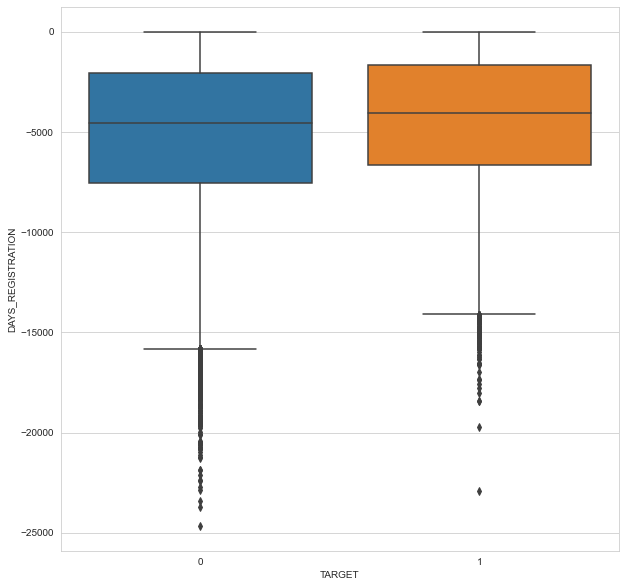

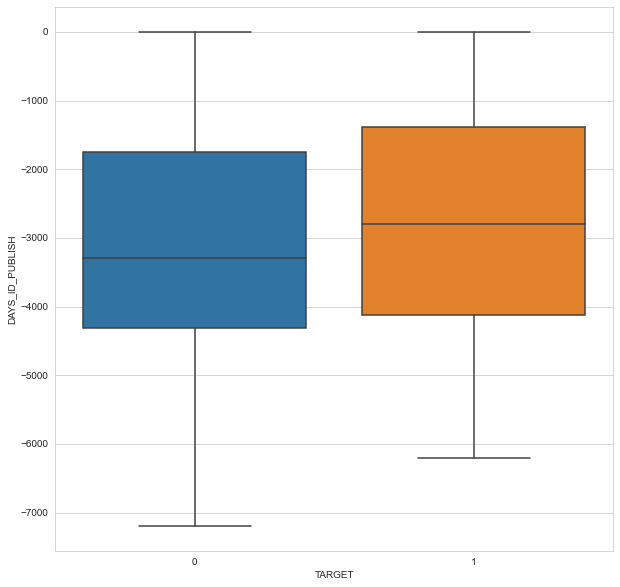

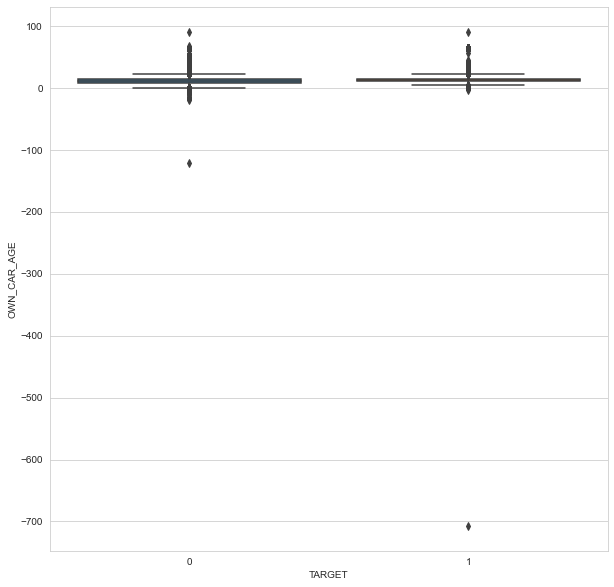

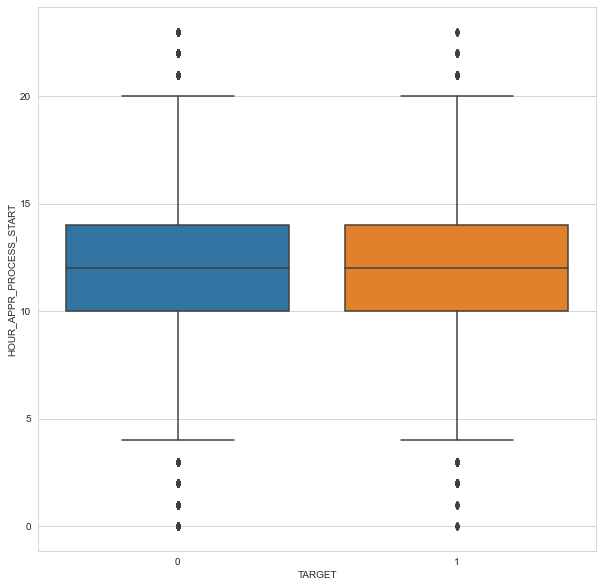

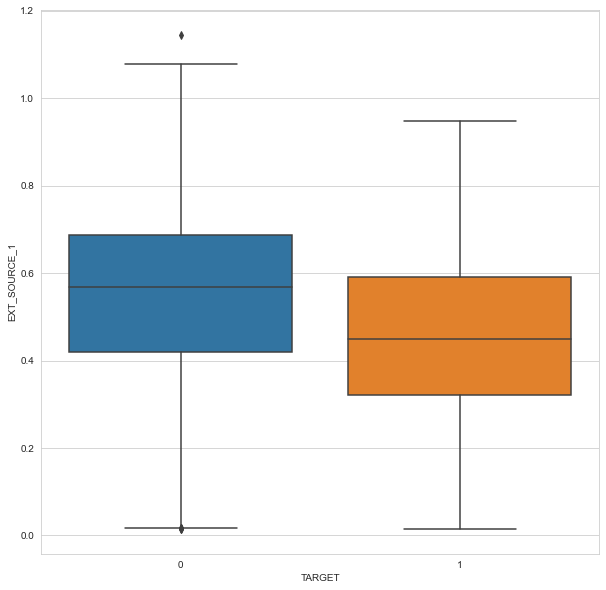

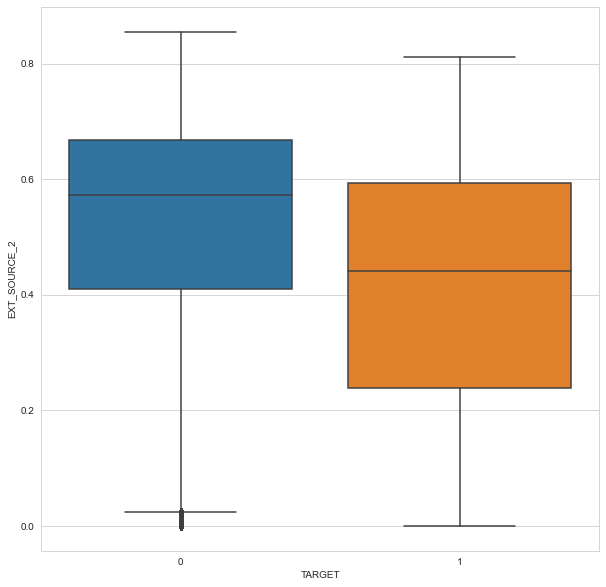

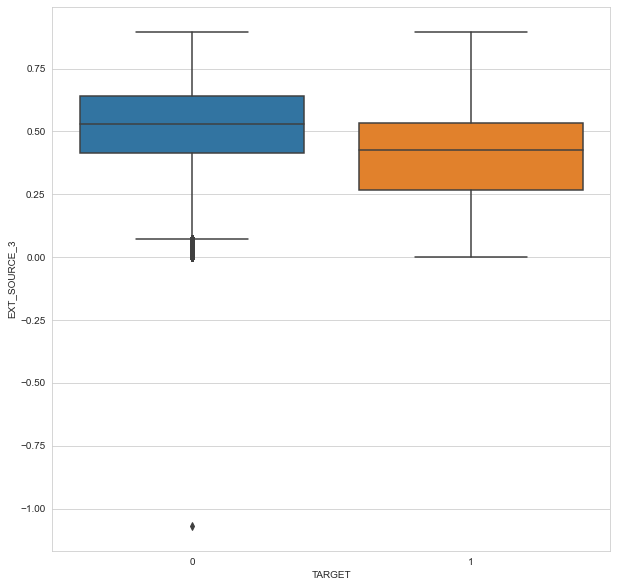

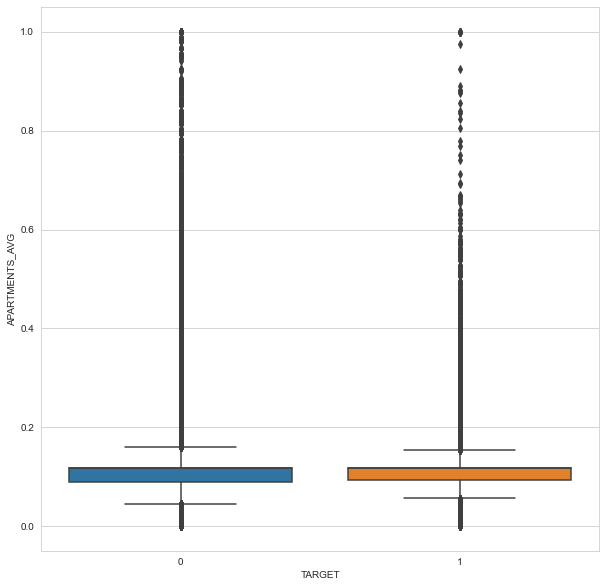

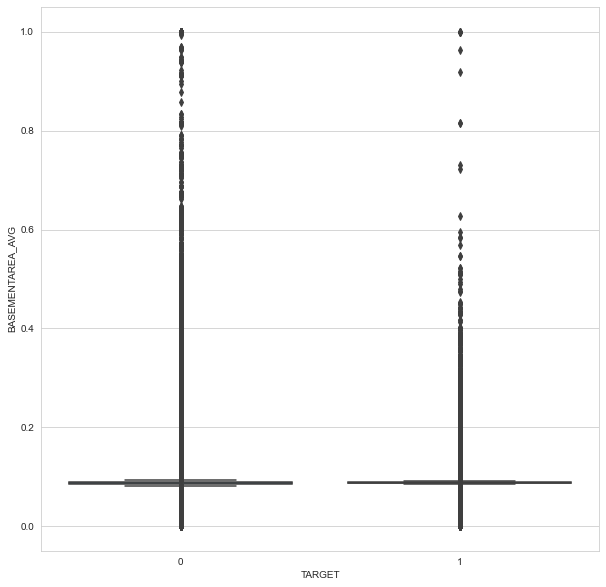

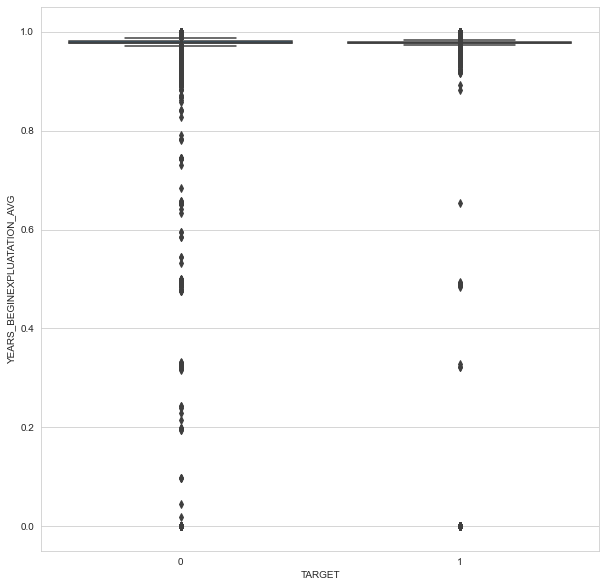

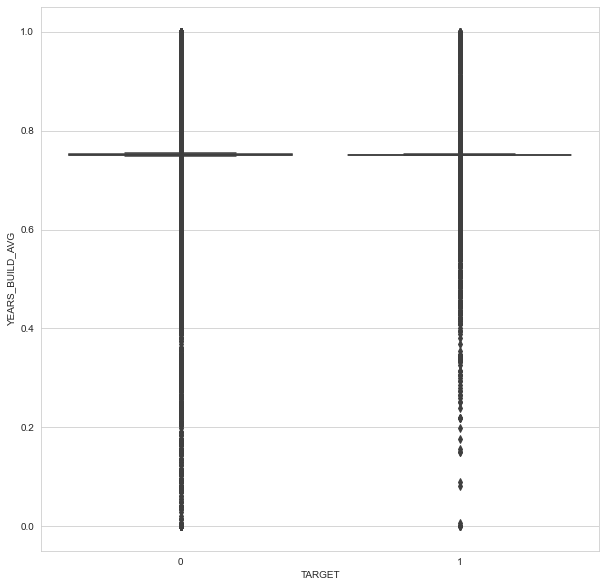

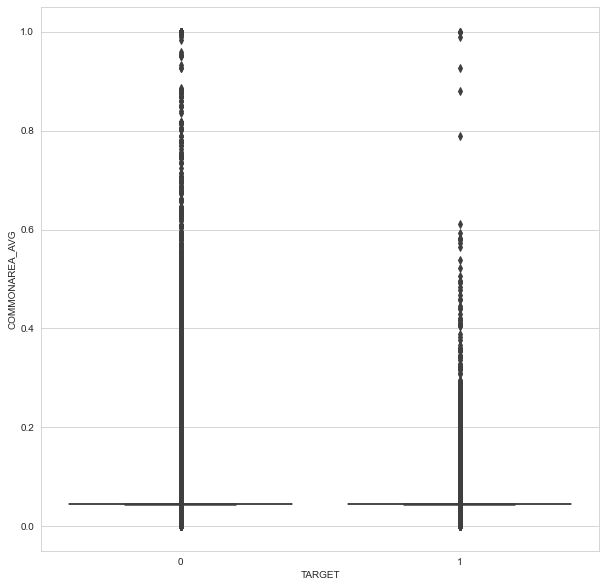

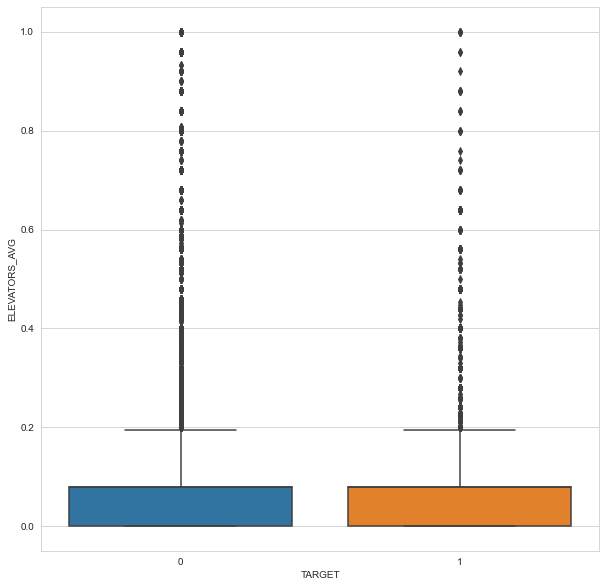

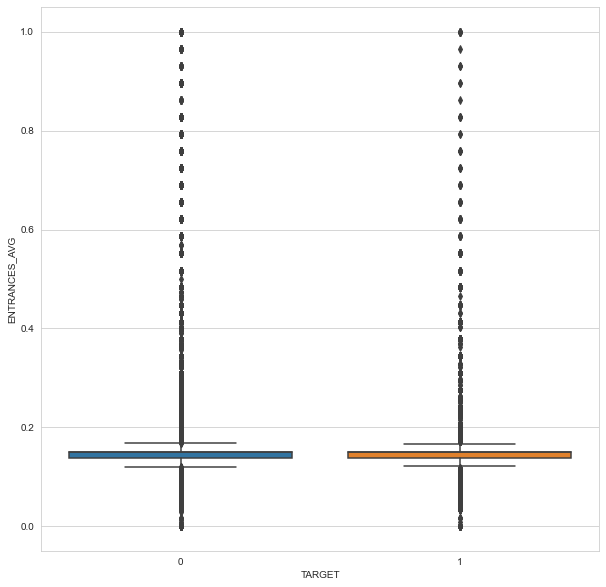

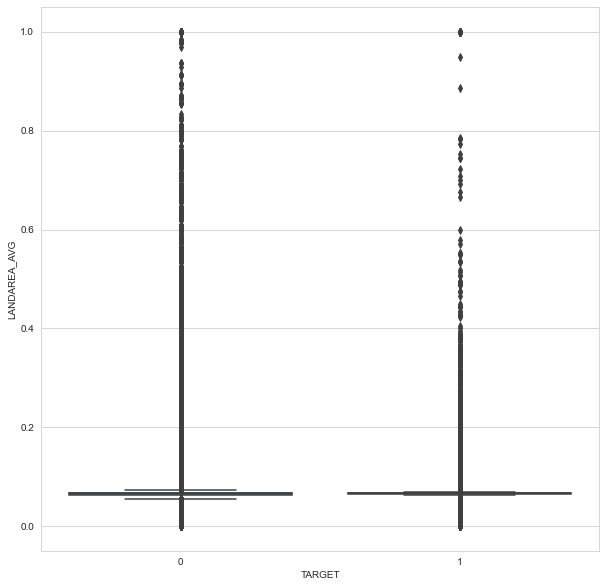

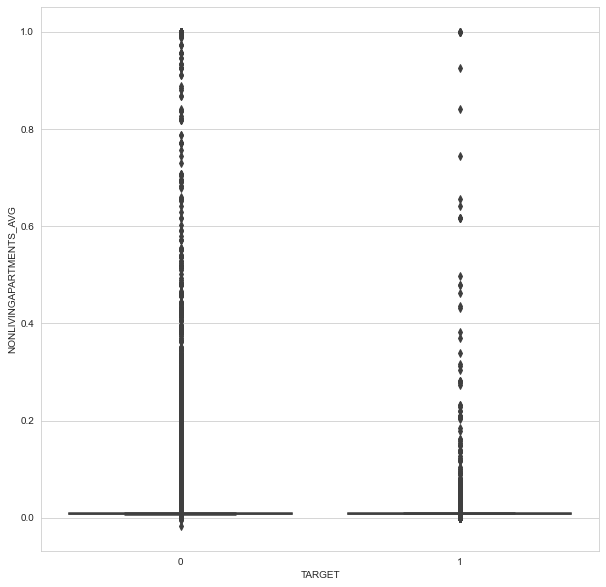

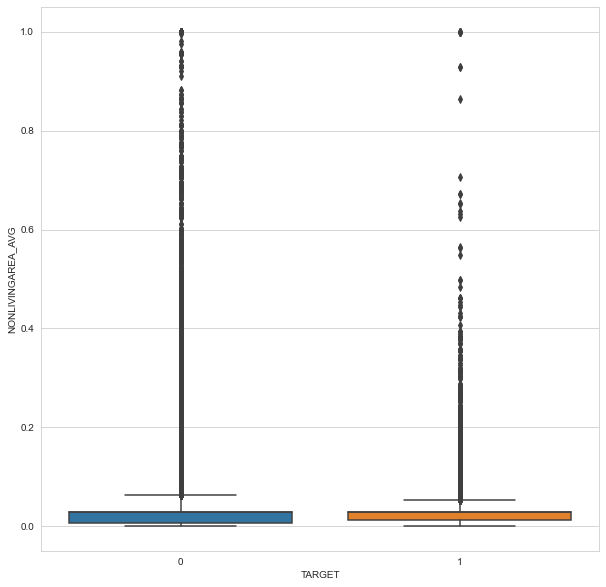

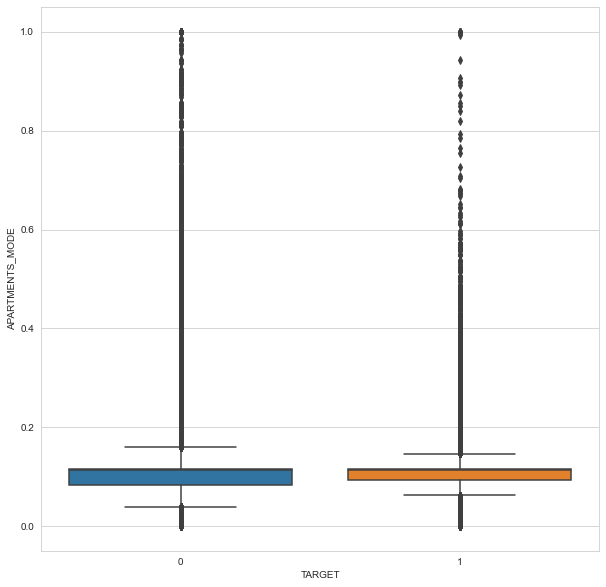

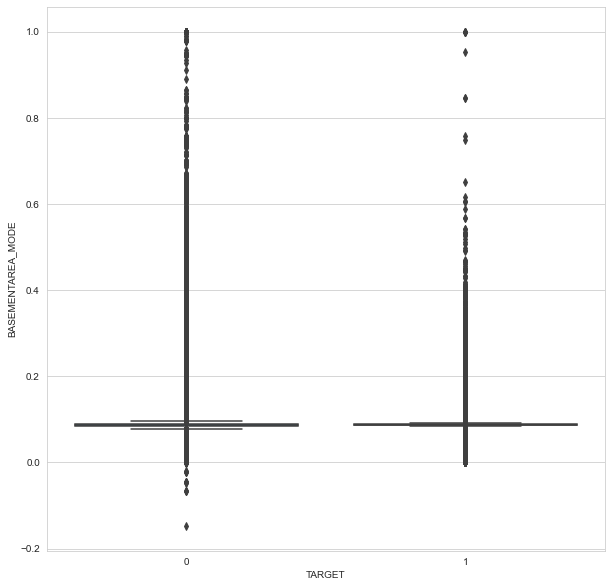

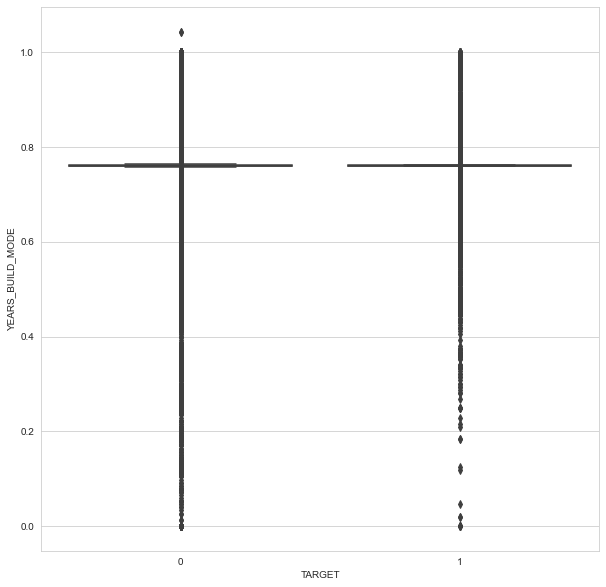

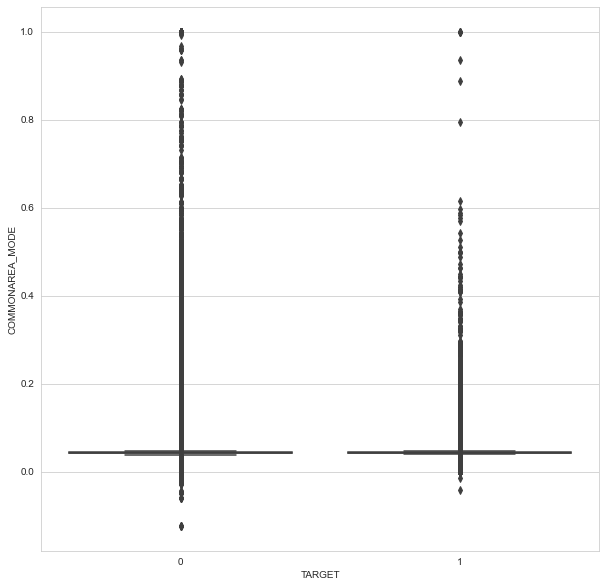

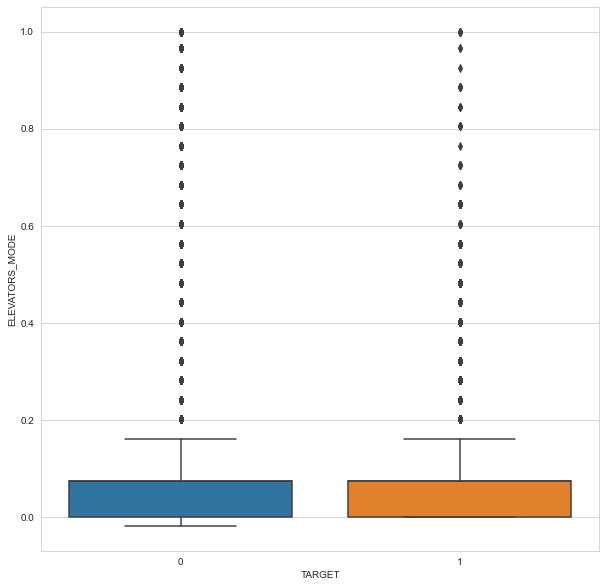

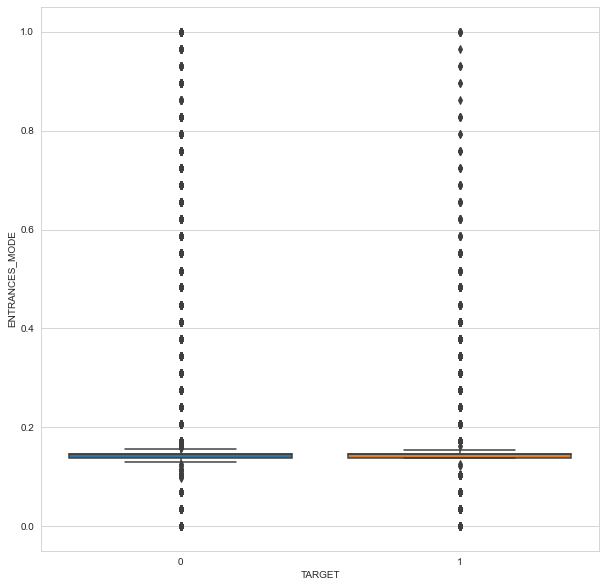

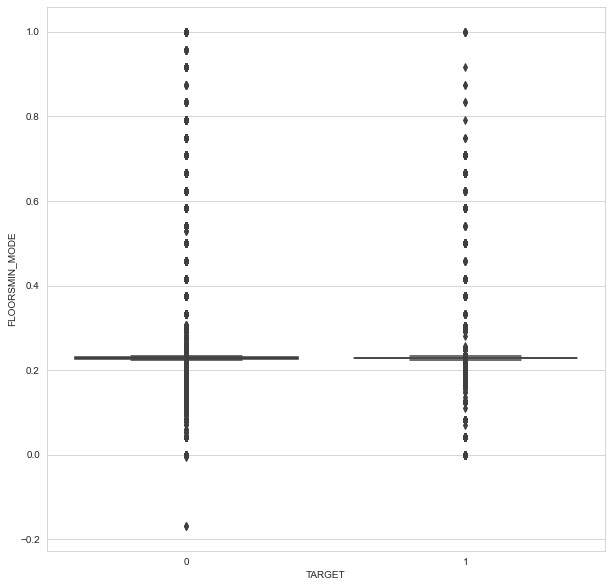

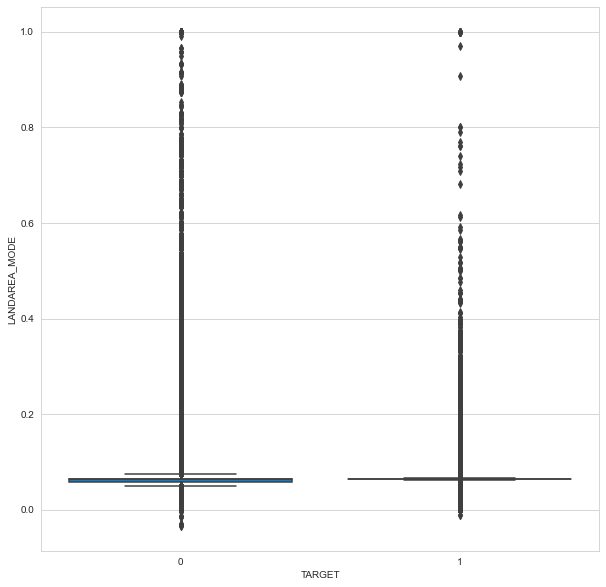

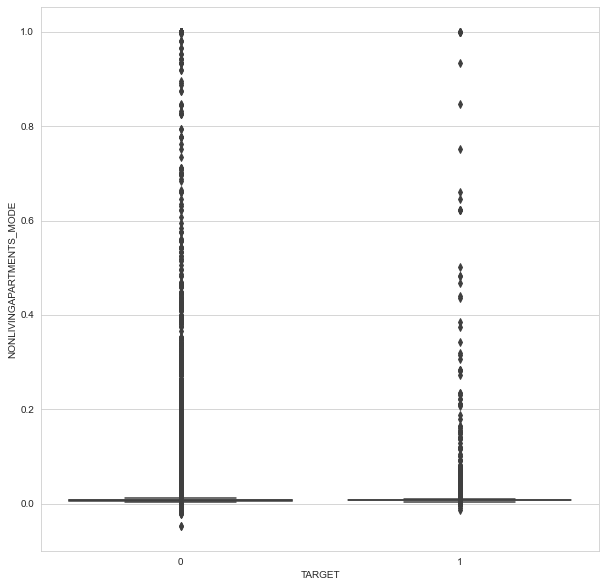

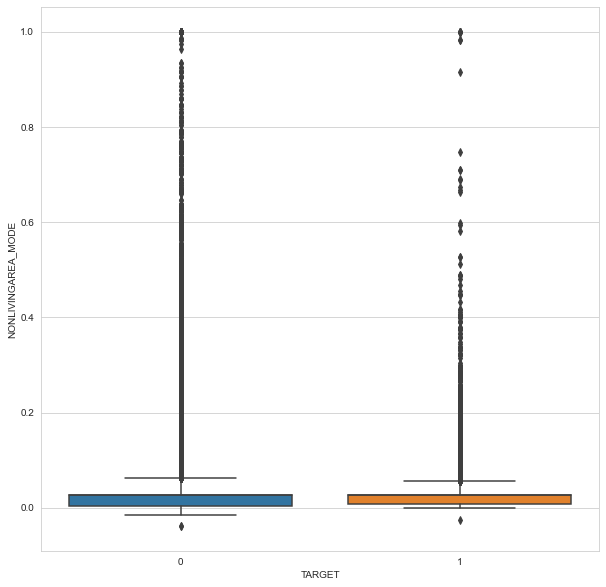

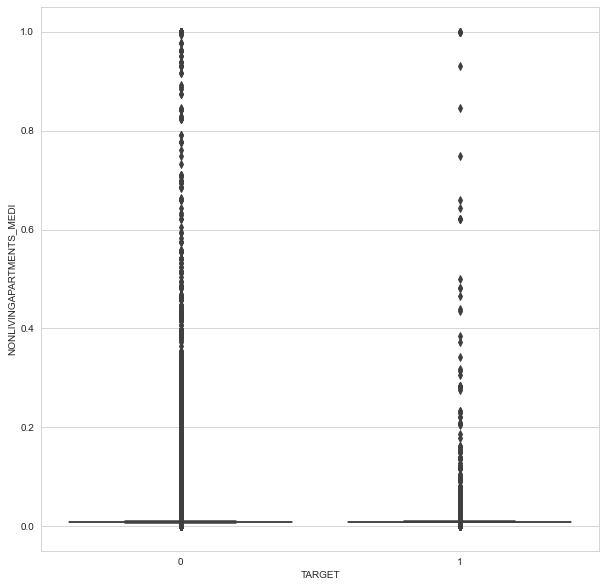

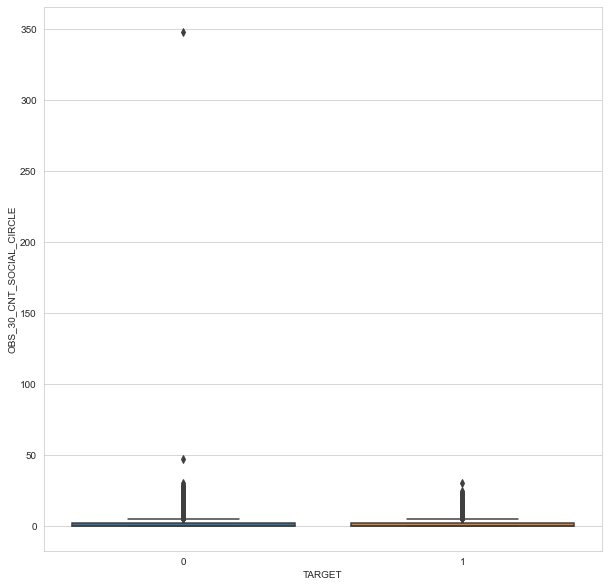

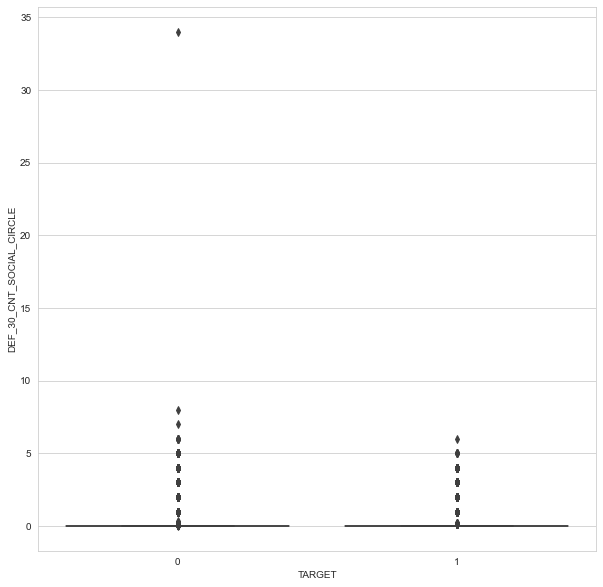

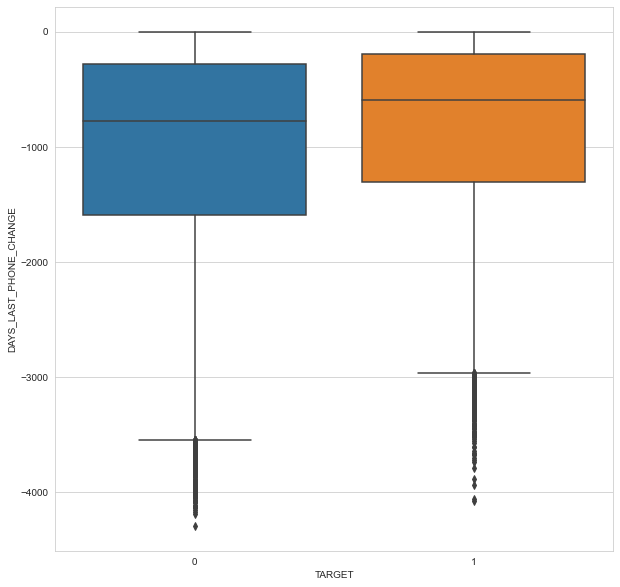

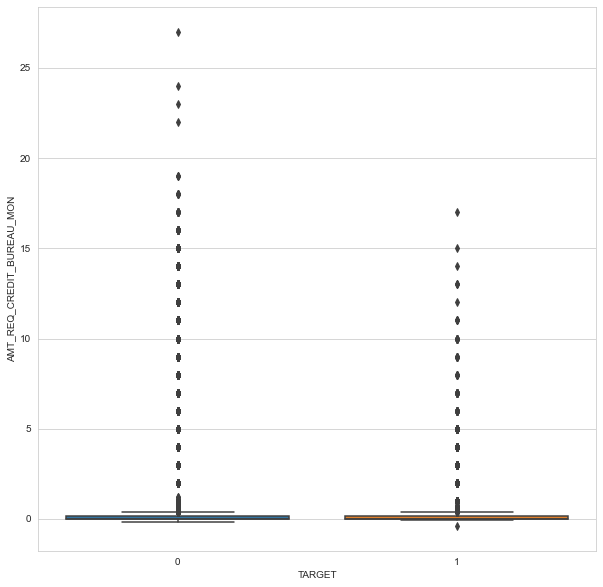

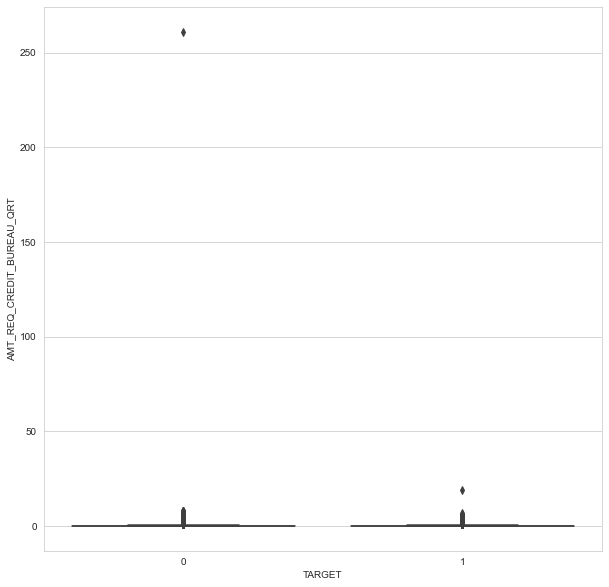

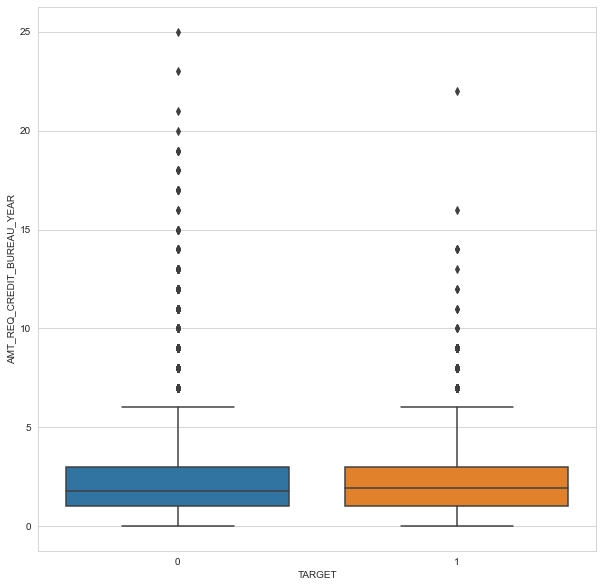

In [254]:
sns.set_style("whitegrid")

for col in df_application.select_dtypes(np.number).columns : 
    plt.figure(figsize=(10,10))
    sns.boxplot(x = 'TARGET', y = col, data = df_application) 
    plt.show()
    pass

### Normal Test

In [264]:
from scipy import stats

stats_normal_results = {}

for var in df_application.select_dtypes(np.number).columns:
    print("variable à tester :",var )
    
    k2, p = stats.normaltest(df_application[[var]])
    alpha = 0.05
    print("statistics = ",k2,"p = {}".format(p))
    
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print("The null hypothesis can be rejected\n")
        stats_normal_results[var] = "no normal"
    else:
        print("The null hypothesis cannot be rejected\n")
        stats_normal_results[var] = "normal"

variable à tester : Unnamed: 0
statistics =  [273025.86096542] p = [0.]
The null hypothesis can be rejected

variable à tester : CNT_CHILDREN
statistics =  [135639.37171556] p = [0.]
The null hypothesis can be rejected

variable à tester : AMT_INCOME_TOTAL
statistics =  [1808234.67425603] p = [0.]
The null hypothesis can be rejected

variable à tester : AMT_CREDIT
statistics =  [63010.56681798] p = [0.]
The null hypothesis can be rejected

variable à tester : REGION_POPULATION_RELATIVE
statistics =  [86730.31895321] p = [0.]
The null hypothesis can be rejected

variable à tester : DAYS_BIRTH
statistics =  [93796.73391873] p = [0.]
The null hypothesis can be rejected

variable à tester : DAYS_EMPLOYED
statistics =  [76992.595457] p = [0.]
The null hypothesis can be rejected

variable à tester : DAYS_REGISTRATION
statistics =  [17328.08599761] p = [0.]
The null hypothesis can be rejected

variable à tester : DAYS_ID_PUBLISH
statistics =  [138882.9080601] p = [0.]
The null hypothesis can 

In [265]:
stats_normal_results

{'Unnamed: 0': 'no normal',
 'CNT_CHILDREN': 'no normal',
 'AMT_INCOME_TOTAL': 'no normal',
 'AMT_CREDIT': 'no normal',
 'REGION_POPULATION_RELATIVE': 'no normal',
 'DAYS_BIRTH': 'no normal',
 'DAYS_EMPLOYED': 'no normal',
 'DAYS_REGISTRATION': 'no normal',
 'DAYS_ID_PUBLISH': 'no normal',
 'OWN_CAR_AGE': 'no normal',
 'HOUR_APPR_PROCESS_START': 'no normal',
 'EXT_SOURCE_1': 'no normal',
 'EXT_SOURCE_2': 'no normal',
 'EXT_SOURCE_3': 'no normal',
 'APARTMENTS_AVG': 'no normal',
 'BASEMENTAREA_AVG': 'no normal',
 'YEARS_BEGINEXPLUATATION_AVG': 'no normal',
 'YEARS_BUILD_AVG': 'no normal',
 'COMMONAREA_AVG': 'no normal',
 'ELEVATORS_AVG': 'no normal',
 'ENTRANCES_AVG': 'no normal',
 'LANDAREA_AVG': 'no normal',
 'NONLIVINGAPARTMENTS_AVG': 'no normal',
 'NONLIVINGAREA_AVG': 'no normal',
 'APARTMENTS_MODE': 'no normal',
 'BASEMENTAREA_MODE': 'no normal',
 'YEARS_BUILD_MODE': 'no normal',
 'COMMONAREA_MODE': 'no normal',
 'ELEVATORS_MODE': 'no normal',
 'ENTRANCES_MODE': 'no normal',
 'FLOO

### mann_whitney_u_test

In [266]:
df_target = df_application[df_application.TARGET==1]

In [267]:
df_target

Unnamed: 0 TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0                0      1         Cash loans           M            N   
26              26      1         Cash loans           F            N   
40              40      1         Cash loans           M            N   
42              42      1         Cash loans           F            N   
81              81      1         Cash loans           F            N   
...            ...    ...                ...         ...          ...   
307448      307448      1         Cash loans           M            N   
307475      307475      1         Cash loans           F            N   
307481      307481      1         Cash loans           M            N   
307489      307489      1         Cash loans           F            N   
307509      307509      1         Cash loans           F            N   

       FLAG_OWN_REALTY NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0                    Y   Unaccompanied               Working   
26                   Y   Unaccompanied               Working   
40                   Y   Unaccompanied  Commercial associate   
42                   N   Unaccompanied               Working   
81                   Y   Unaccompanied             Pensioner   
...                ...             ...                   ...   
307448               N   Unaccompanied               Working   
307475               N   Unaccompanied               Working   
307481               Y          Family               Working   
307489               Y   Unaccompanied  Commercial associate   
307509               Y   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
26      Secondary / secondary special                 Widow   
40      Secondary / secondary special               Married   
42      Secondary / secondary special        Civil marriage   
81      Secondary / secondary special               Married   
...                               ...                   ...   
307448  Secondary / secondary special               Married   
307475               Higher education        Civil marriage   
307481  Secondary / secondary special               Married   
307489  Secondary / secondary special        Civil marriage   
307509  Secondary / secondary special               Married   

        NAME_HOUSING_TYPE FLAG_MOBIL FLAG_EMP_PHONE FLAG_WORK_PHONE  \
0       House / apartment          1              1               0   
26      House / apartment          1              1               0   
40      House / apartment          1              1               0   
42      House / apartment          1              1               1   
81      House / apartment          1              0               0   
...                   ...        ...            ...             ...   
307448  House / apartment          1              1               1   
307475  House / apartment          1              1               1   
307481  House / apartment          1              1               0   
307489  House / apartment          1              1               0   
307509  House / apartment          1              1               0   

       FLAG_CONT_MOBILE FLAG_PHONE FLAG_EMAIL OCCUPATION_TYPE  \
0                     1          1          0        Laborers   
26                    1          0          0   Cooking staff   
40                    1          0          0        Laborers   
42                    1          1          0     Sales staff   
81                    1          0          0             NaN   
...                 ...        ...        ...             ...   
307448                1          0          0        Laborers   
307475                1          0          0        Laborers   
307481                1          1          0        Managers   
307489                1          0          0     Sales staff   
307509                1          0   

In [271]:
df_sampled = df_application[df_application.TARGET==0].sample(frac =0.1)

In [272]:
df_sampled

Unnamed: 0 TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
259269      259269      0         Cash loans           F            Y   
294170      294170      0         Cash loans           M            Y   
199419      199419      0         Cash loans           F            N   
31660        31660      0         Cash loans           F            N   
46653        46653      0         Cash loans           F            N   
...            ...    ...                ...         ...          ...   
94184        94184      0         Cash loans           F            N   
45771        45771      0    Revolving loans           M            Y   
72270        72270      0         Cash loans           F            N   
52461        52461      0    Revolving loans           M            N   
38681        38681      0         Cash loans           F            N   

       FLAG_OWN_REALTY NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
259269               N   Unaccompanied               Working   
294170               Y        Children  Commercial associate   
199419               Y          Family               Working   
31660                Y   Unaccompanied  Commercial associate   
46653                Y        Children               Working   
...                ...             ...                   ...   
94184                Y   Unaccompanied               Working   
45771                Y   Unaccompanied               Working   
72270                N   Unaccompanied               Working   
52461                Y   Unaccompanied               Working   
38681                Y   Unaccompanied             Pensioner   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
259269  Secondary / secondary special               Married   
294170  Secondary / secondary special               Married   
199419  Secondary / secondary special               Married   
31660                Higher education               Married   
46653                Higher education               Married   
...                               ...                   ...   
94184   Secondary / secondary special                 Widow   
45771                Higher education               Married   
72270   Secondary / secondary special               Married   
52461                Higher education  Single / not married   
38681   Secondary / secondary special               Married   

        NAME_HOUSING_TYPE FLAG_MOBIL FLAG_EMP_PHONE FLAG_WORK_PHONE  \
259269  House / apartment          1              1               0   
294170  House / apartment          1              1               0   
199419  House / apartment          1              1               1   
31660   House / apartment          1              1               0   
46653   House / apartment          1              1               0   
...                   ...        ...            ...             ...   
94184   House / apartment          1              1               1   
45771   House / apartment          1              1               0   
72270   House / apartment          1              1               0   
52461   House / apartment          1              1               1   
38681   House / apartment          1              0               0   

       FLAG_CONT_MOBILE FLAG_PHONE FLAG_EMAIL        OCCUPATION_TYPE  \
259269                1          0          0  High skill tech staff   
294170                1          0          0               Laborers   
199419                1          0          0         Security staff   
31660                 1          0          0            Accountants   
46653                 1          0          0         Medicine staff   
...                 ...        ...        ...                    ...   
94184                 1          0          0            Sales staff   
45771                 1          0          0  High skill tech staff   
72270                 1          0          0            Sales staff   
52461                 1         

In [275]:
def mann_whitney_u_test(distribution_1, distribution_2):
    """
    Perform the Mann-Whitney U Test, comparing two different distributions.
    Args:
       distribution_1: List. 
       distribution_2: List.
    Outputs:
        u_statistic: Float. U statisitic for the test.
        p_value: Float.
    """
    u_statistic, p_value = stats.mannwhitneyu(distribution_1, distribution_2)
    return u_statistic, p_value


In [278]:
#Perform the Mann-Whitney U Test on the two distributions

stats_normal_results_2 ={}

for var in df_application.select_dtypes(np.number).columns:
    print("variable à tester :",var )

    u_statistic, p_value = mann_whitney_u_test(list(df_target[var]), list(df_sampled[var]))

    alpha = 0.05
    print("statistics = ",u_statistic,"p = {}".format(p))

    if p < alpha:  # null hypothesis: population differe
        print("The null hypothesis can be rejected\n")
        stats_normal_results_2[var] = "different"
    else:
        print("The null hypothesis cannot be rejected\n")
        stats_normal_results_2[var] = "same"

variable à tester : Unnamed: 0
statistics =  350877732.0 p = [0.]
The null hypothesis can be rejected

variable à tester : CNT_CHILDREN
statistics =  339386889.0 p = [0.]
The null hypothesis can be rejected

variable à tester : AMT_INCOME_TOTAL
statistics =  336529077.0 p = [0.]
The null hypothesis can be rejected

variable à tester : AMT_CREDIT
statistics =  338369730.5 p = [0.]
The null hypothesis can be rejected

variable à tester : REGION_POPULATION_RELATIVE
statistics =  325974815.5 p = [0.]
The null hypothesis can be rejected

variable à tester : DAYS_BIRTH
statistics =  292759189.5 p = [0.]
The null hypothesis can be rejected

variable à tester : DAYS_EMPLOYED
statistics =  332416198.5 p = [0.]
The null hypothesis can be rejected

variable à tester : DAYS_REGISTRATION
statistics =  321341070.5 p = [0.]
The null hypothesis can be rejected

variable à tester : DAYS_ID_PUBLISH
statistics =  310841466.5 p = [0.]
The null hypothesis can be rejected

variable à tester : OWN_CAR_AGE
st

In [279]:
stats_normal_results_2

{'Unnamed: 0': 'different',
 'CNT_CHILDREN': 'different',
 'AMT_INCOME_TOTAL': 'different',
 'AMT_CREDIT': 'different',
 'REGION_POPULATION_RELATIVE': 'different',
 'DAYS_BIRTH': 'different',
 'DAYS_EMPLOYED': 'different',
 'DAYS_REGISTRATION': 'different',
 'DAYS_ID_PUBLISH': 'different',
 'OWN_CAR_AGE': 'different',
 'HOUR_APPR_PROCESS_START': 'different',
 'EXT_SOURCE_1': 'different',
 'EXT_SOURCE_2': 'different',
 'EXT_SOURCE_3': 'different',
 'APARTMENTS_AVG': 'different',
 'BASEMENTAREA_AVG': 'different',
 'YEARS_BEGINEXPLUATATION_AVG': 'different',
 'YEARS_BUILD_AVG': 'different',
 'COMMONAREA_AVG': 'different',
 'ELEVATORS_AVG': 'different',
 'ENTRANCES_AVG': 'different',
 'LANDAREA_AVG': 'different',
 'NONLIVINGAPARTMENTS_AVG': 'different',
 'NONLIVINGAREA_AVG': 'different',
 'APARTMENTS_MODE': 'different',
 'BASEMENTAREA_MODE': 'different',
 'YEARS_BUILD_MODE': 'different',
 'COMMONAREA_MODE': 'different',
 'ELEVATORS_MODE': 'different',
 'ENTRANCES_MODE': 'different',
 'FLOO

In [280]:
df_application.to_csv(r'C:\\Users\\alojou\\Notebook Python\\Projet_7 Modèle de scoring\\Data\\df_clean.csv')

In [ ]:
### next model